<a href="https://colab.research.google.com/github/Saibot19/7506R-1C2023-GRUPO21/blob/TP1/7506R_TP1_GRUPO21_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/FIUBA_gris_transparente.png" width="220" align="right" >




# **Organización de Datos (75.06)**
        
## **Trabajo Práctico 1.**  
        
**Grupo 21:** 
* Cuevas; Juan Francisco. 
* Pata; Martín. 
* Serpa; Tobías.

---


## **Importación de librerias y Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Datasets/hotels_train.csv")

#Borramos columnas que no deberian estar
df.drop("reservation_status_date", axis="columns", inplace=True)

df_trabajo = df.copy()
df_trabajo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
0        No Deposit    9.0     NaN                    0        Transient   
1        No Deposit    NaN     NaN                    0        Transient   
2        No Deposit    9.0     NaN                    0        Transient   
3        Non Refund  154.0     NaN                    0        Transient   
4        No Deposit   20.0     NaN                    0  Transient-Party   
...             ...    ...     ...                  ...              ...   
61908    No Deposit  240.0     NaN                    0        Transient   
61909    No Deposit    NaN     NaN                    0        Transient   
61910    No Deposit    NaN   153.0                    0        Transient   
61911    Non Refund   96.0     NaN                    0        Transient   
61912    No Deposit    9.0     NaN                    0        Transient   

          adr  required_car_parking_spaces  total_of_special_requests  \
0      115.50                            0                          1   
1       42.00                            1                          0   
2      229.00                            0                          2   
3       75.00                            0                          0   
4       75.00                            0                          1   
...       ...                          ...                        ...   
61908   48.00                  

---


## Exploracion Inicial

Analizar cada variable, considerando los siguientes aspectos
- Tipo de variable
- Variables Cuantitativas: calcular medidas de resumen: media, mediana,moda, etc
- Variables Cualitativas: reportar los posibles valores que toman y cuán
frecuentemente lo hacen.
- Determinar si existen variables irrelevantes para el análisis
- Realizar un análisis gráfico de las distribuciones de las variables
- Analizar las correlaciones existentes entre las variables.
- Analizar la relación de las variables con el target

---

### Descripcion de las variables

A continuacion tenemos la siguientes variables.

In [ ]:
df_trabajo.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

| **Variable** | **Tipo** | **Descripción**|
|--------------|----------|----------------|
| **hotel**                     | Variable categorica  | Tipo de hotel |
| **lead_time**                 | Variable cuantitativa discreta | Días entre el momento en que se hizo la reserva y la fecha de llegada |
| **arrival_date_year**         | Variable cuantitativa discreta | Año de llegada |
| **arrival_date_month**        | Variable cuantitativa discreta | Mes de llegada |
| **arrival_date_week_number**  | Variable cuantitativa discreta | Número de semana del año de llegada |
| **arrival_date_day_of_month** | Variable cuantitativa discreta | Día del mes de llegada |
| **stays_in_weekend_nights**   | Variable cuantitativa discreta | Número de noches de fin de semana (sábado o domingo) que el huésped se queda en el hotel |
| **stays_in_week_nights**      | Variable cuantitativa discreta | Número de noches de entre semana que el huésped se queda en el hotel |
| **adults**                    | Variable cuantitativa discreta | Número de adultos en la reserva |
| **children**                  | Variable cuantitativa discreta | Número de niños en la reserva |
| **babies**                    | Variable cuantitativa discreta | Número de bebés en la reserva |
| **meal**                      | Variable categorica            | Tipo de comida en la reserva.<br>**Undefined/SC** – no meal package<br>**BB** – Bed & Breakfast<br>**HB** – Half board (breakfast and one other meal – usually dinner)<br>**FB** – Full board (breakfast, lunch and dinner) |
| **country**                   | Variable categorica            | País de origen del huésped |
| **market_segment**            | Variable categorica            | Segmento de mercado de la reserva |
| **distribution_channel**      | Variable categorica            | Canal de distribución de la reserva |
| **is_repeated_guest**         | Variable categorica            | Indica si el huésped ha reservado en el hotel anteriormente |
| **previous_cancellations**    | Variable cuantitativa discreta | Número de reservas canceladas anteriormente por el huésped |
| **previous_bookings_not_canceled**|Variable cuantitativa discreta| Número de reservas que el huésped ha realizado y no fueron canceladas |
| **reserved_room_type**        | Variable categorica            | Tipo de habitación reservada |
| **assigned_room_type**        | Variable categorica            | Tipo de habitación asignada |
| **booking_changes**           | Variable cuantitativa discreta | Número de cambios realizados en la reserva |
| **deposit_type**              | Variable categorica            | Tipo de depósito realizado por el huésped |
| **agent**                     | Variable categorica            | ID de la agencia de viajes a través de la cual se hizo la reserva |
| **company**                   | Variable categorica            | ID de la compañía que realizó la reserva o pagó por ella |
| **days_in_waiting_list**      | Variable cuantitativa discreta | Número de días que la reserva estuvo en lista de espera antes de ser confirmada |
| **customer_type**             | Variable categorica            | Tipo de cliente.<br>**Contract** - when the booking has an allotment or other type of contract associated to it;<br>**Group** – when the booking is associated to a group;<br>**Transient** – when the booking is not part of a group or contract, and is not associated to other transient booking;<br> **Transient-party** – when the booking is transient, but is associated to at least other transient booking |
| **adr**                       | Variable cuantitativa continua | Tarifa diaria promedio (Average Daily Rate) de la reserva |
| **required_car_parking_spaces**|Variable cuantitativa discreta | Número de plazas de aparcamiento solicitadas por el huésped |
| **total_of_special_requests** | Variable cuantitativa discreta | Número de solicitudes especiales realizadas por el huésped |
| **id**                        | Variable categorica            | Identificador único de la reserva |
| **is_canceled**               | Variable categorica            | Indica si la reserva fue cancelada (1) o no (0) |

Ya de por si podemos decir que la variable **id** es una variable irrelevante ya que seria unico para cada reserva. (Esta variable va a ser usada despues para subir resultados a Kaggle)
 

---

### Variables cuantitativas

A continuacion se va a indagar mas sobre las variables cuantitativas, fijandonos en su distribucion y su relacion con el target is_canceled

In [ ]:
vars_cual = ["lead_time","arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","stays_in_weekend_nights","stays_in_week_nights",
              "adults","children","babies","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes","days_in_waiting_list",
              "adr","required_car_parking_spaces","total_of_special_requests"]
df_cualitativas = df_trabajo[vars_cual]      
df_cualitativas.describe()

lead_time  arrival_date_year  arrival_date_week_number  \
count  61913.000000       61913.000000               61913.00000   
mean     112.248187        2016.154749                  27.21808   
std      110.717953           0.708389                  13.52601   
min        0.000000        2015.000000                   1.00000   
25%       23.000000        2016.000000                  16.00000   
50%       78.000000        2016.000000                  28.00000   
75%      172.000000        2017.000000                  38.00000   
max      629.000000        2017.000000                  53.00000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count               61913.000000             61913.000000   
mean                   15.785812                 0.924135   
std                     8.795489                 0.993101   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                16.000000   

       stays_in_week_nights        adults      children        babies  \
count          61913.000000  61913.000000  61909.000000  61913.000000   
mean               2.510054      1.862791      0.104896      0.007155   
std                1.884926      0.589066      0.402847      0.092158   
min                0.000000      0.000000      0.000000      0.000000   
25%                1.000000      2.000000      0.000000      0.000000   
50%                2.000000      2.000000      0.000000      0.000000   
75%                3.000000      2.000000      0.000000      0.000000   
max               40.000000     55.000000     10.000000      9.000000   

       is_repeated_guest  previous_cancellations  \
count       61913.000000            61913.000000   
mean            0.027991                0.114790   
std             0.164948                0.993723   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count                    61913.000000     61913.000000          61913.000000   
mean                         0.115420         0.195952              2.638977   
std                          1.396359         0.610519             18.619092   
min                          0.000000         0.000000              0.000000   
25%                          0.000000         0.000000              0.000000   
50%                          0.000000         0.000000              0.000000   
75%                          0.000000         0.000000              0.000000   
max                         70.000000        17.000000            391.000000   

                adr  required_car_parking_spaces  total_of_special_requests  
count  61913.000000                 61913.000000               61913.000000  
mean     102.383773                     0.049957                   0.523703  
std       47.757640                     0.221023                   0.775412  
min       -6.380000                     0.000000                   0.000000  
25%       70.000000                     0.000000                   0.000000  
50%       95.000000                     0.000000                   0.000000  
75%      126.000000                     0.000000                   1.000000  
max      510.000000                     8.000000                   5.000000

#### Días de anticipo

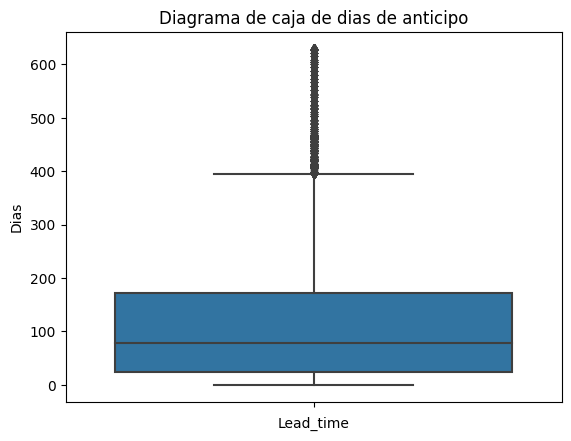

In [ ]:
sns.boxplot(data=df_trabajo, y="lead_time")
plt.xlabel("Lead_time")
plt.ylabel("Dias")
plt.title("Diagrama de caja de dias de anticipo")
plt.show()

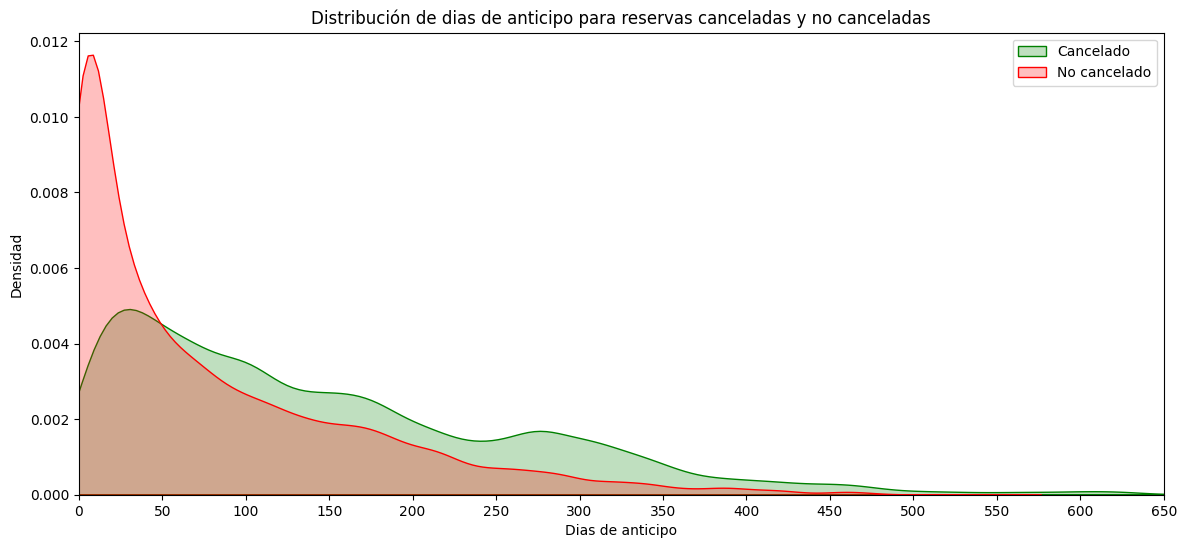

In [ ]:
df_cancelled = df_trabajo[df_trabajo['is_canceled'] == 1]
df_not_cancelled = df_trabajo[df_trabajo['is_canceled'] == 0]

fig, ax = plt.subplots(figsize=(14, 6))

# Plot de la densidad de ADR para reservas canceladas y no canceladas
sns.kdeplot(df_cancelled['lead_time'], fill=True, color="g", label="Cancelado")
sns.kdeplot(df_not_cancelled['lead_time'], fill=True, color="r", label="No cancelado")

# Configuración de la gráfica
plt.title("Distribución de dias de anticipo para reservas canceladas y no canceladas")
plt.xlabel("Dias de anticipo")
plt.ylabel("Densidad")
plt.legend(loc="upper right")

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50)) #Intervalo de x


# Mostrar la gráfica
plt.xlim(0, 650)
plt.show()

Podemos notar que cuanto menos dias de anticipo tenga la reserva menos chance tiene de cancelar.

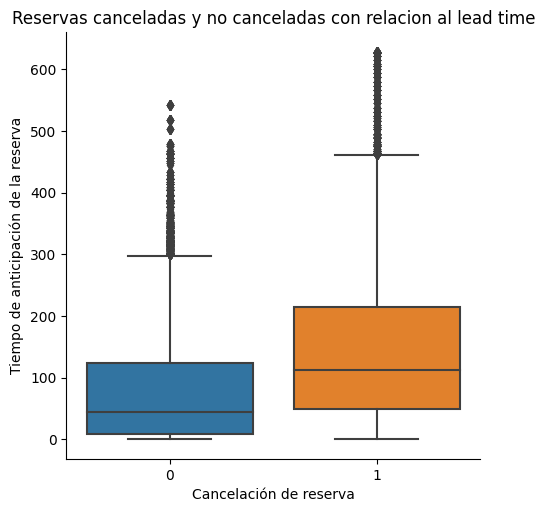

In [ ]:
sns.catplot(x="is_canceled", y="lead_time", kind="box", data=df_trabajo)

plt.xlabel("Cancelación de reserva")
plt.ylabel("Tiempo de anticipación de la reserva")
plt.title("Reservas canceladas y no canceladas con relacion al lead time")

plt.show()


#### Año de llegada de la reserva

Los años de este dataset son 2015, 2016 y 2017. 

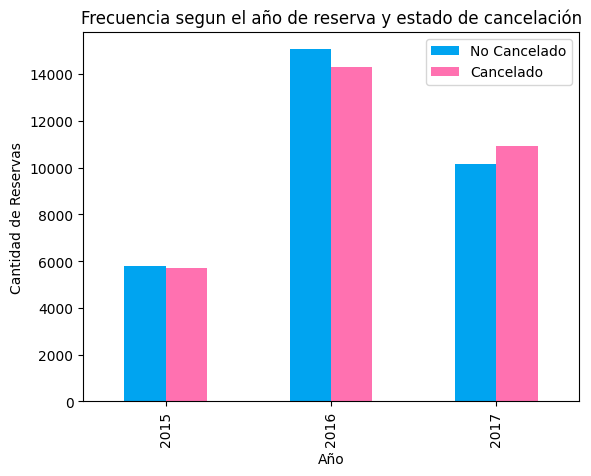

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="arrival_date_year", columns="is_canceled", values="id", aggfunc="count")
pivot_table.columns = ["No Cancelado", "Cancelado"]


grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el año de reserva y estado de cancelación",xlabel='Año',ylabel='Cantidad de Reservas')

Podemos observar que la mayor cantidad de reservas fueron hechas en 2016, seguida de 2017 y por ultimo con una cantidad mucho menor 2015. Pero realmente no se puede notar en ninguna etapa una diferencia notable que nos permita observar un patron para decidir si una reserva se cancelara o no dependiendo del año.

#### Numero de semana de llegada de la reserva

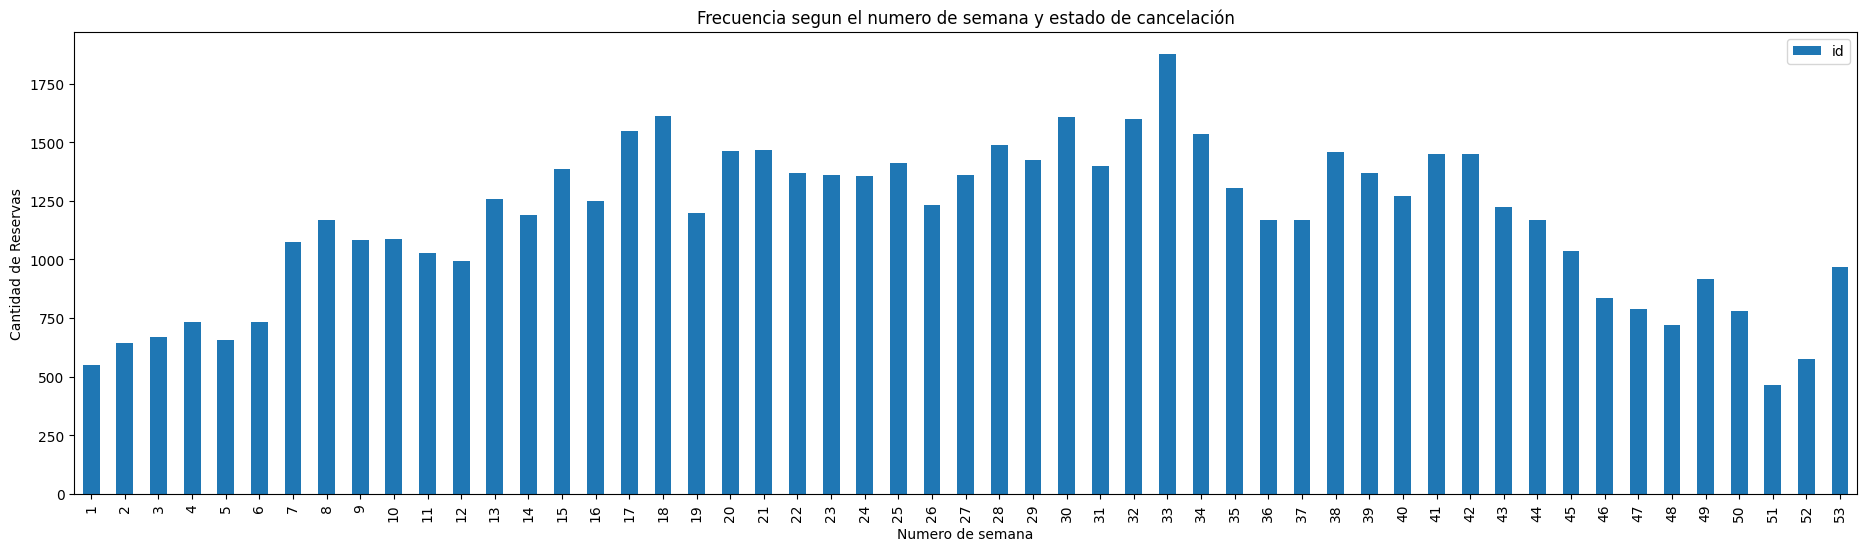

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="arrival_date_week_number", values="id", aggfunc="count", fill_value=0) 
fig, ax = plt.subplots(figsize=(23, 6)) # Set the figure size
grf = pivot_table.plot.bar(ax=ax, stacked=False, title="Frecuencia segun el numero de semana y estado de cancelación",xlabel='Numero de semana',ylabel='Cantidad de Reservas')

In [ ]:
pivot_table.head()

id
arrival_date_week_number     
1                         552
2                         642
3                         668
4                         733
5                         655

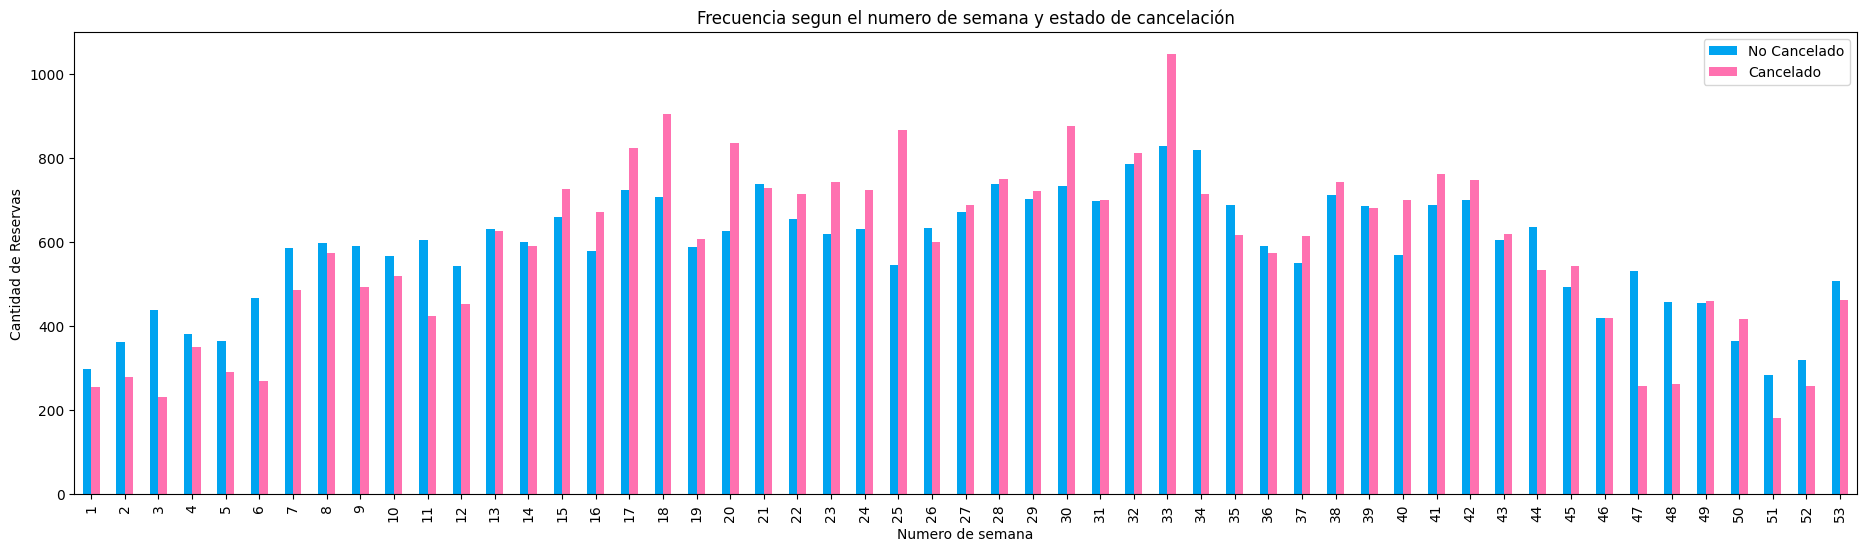

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="arrival_date_week_number", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(23, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de semana y estado de cancelación",xlabel='Numero de semana',ylabel='Cantidad de Reservas')

Vemos que hay una notoria diferencia entre la cantidad de reservas, dependiendo del número de semana. Además notamos que en algunas semanas se nota un patrón que permitiría predecir si una reserva se cancelará o no. Por otro lado, podemos ver que las semanas que poseen mayor cantidad de reservas, corresponden al verano en el hemisferio norte (que es donde se realizan la mayoría de reservas del Dataset). Luego de comentar todo esto, pensamos que esta variable no va a ser tan relevante o participar de un modelo principal, ya que el patrón no es tan notorio, y es complicado de modelar.

#### Numero de dia de llegada de la Reserva

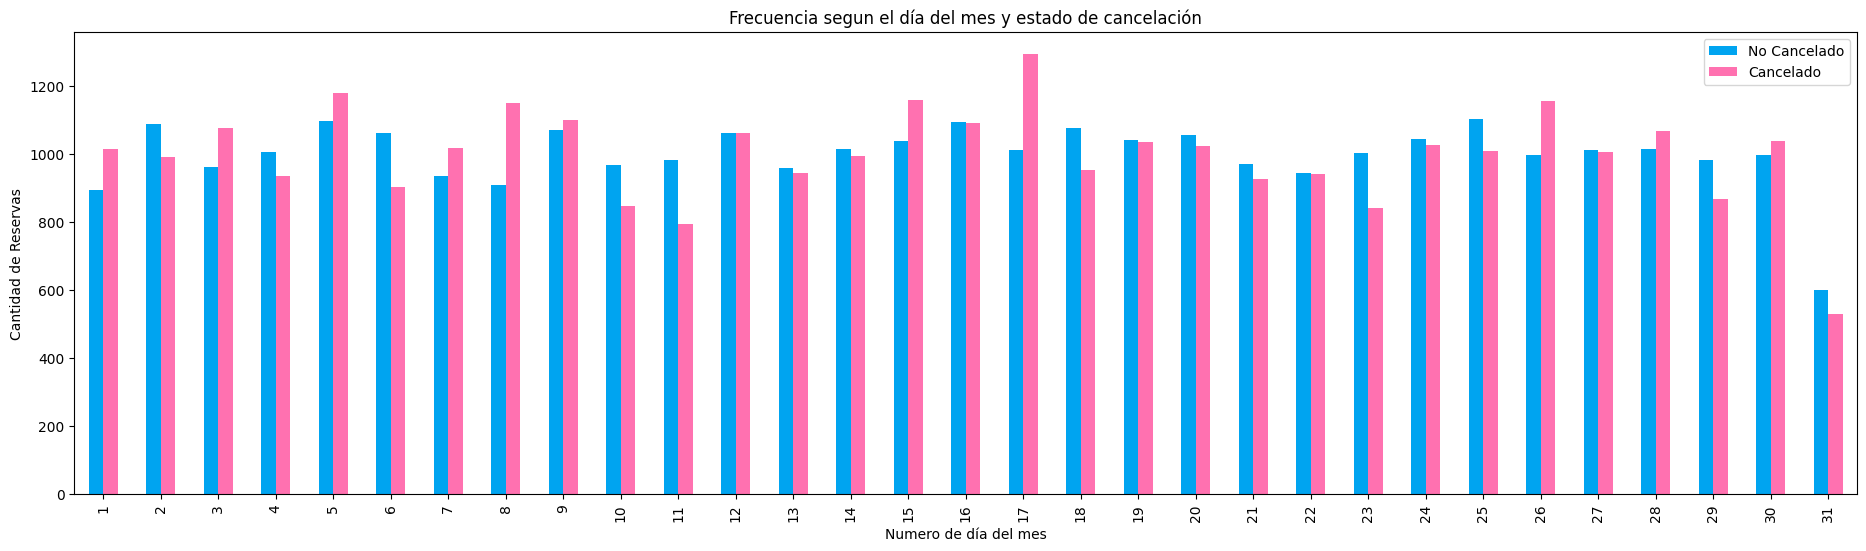

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="arrival_date_day_of_month", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(23, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el día del mes y estado de cancelación",xlabel='Numero de día del mes',ylabel='Cantidad de Reservas')

Podemos observar que la diferencia de  reservas y la tasa de cancelacion dependiendo del día del mes, es casi la misma en todos los casos posibles, por lo que esta variable podría ser irrelevante.

#### Reservas con noche en fin de semana

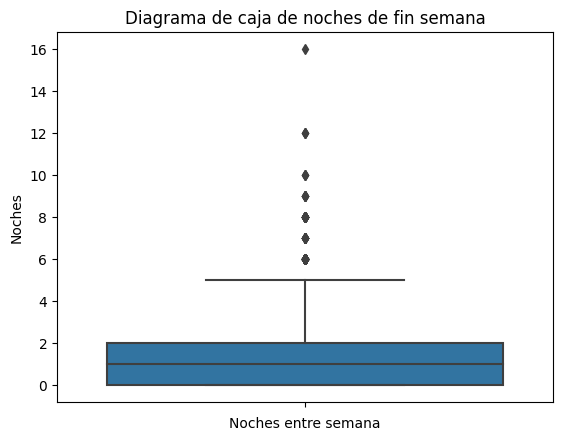

In [ ]:
sns.boxplot(data=df_trabajo, y="stays_in_weekend_nights")
plt.xlabel("Noches entre semana")
plt.ylabel("Noches")
plt.title("Diagrama de caja de noches de fin semana")
plt.show()

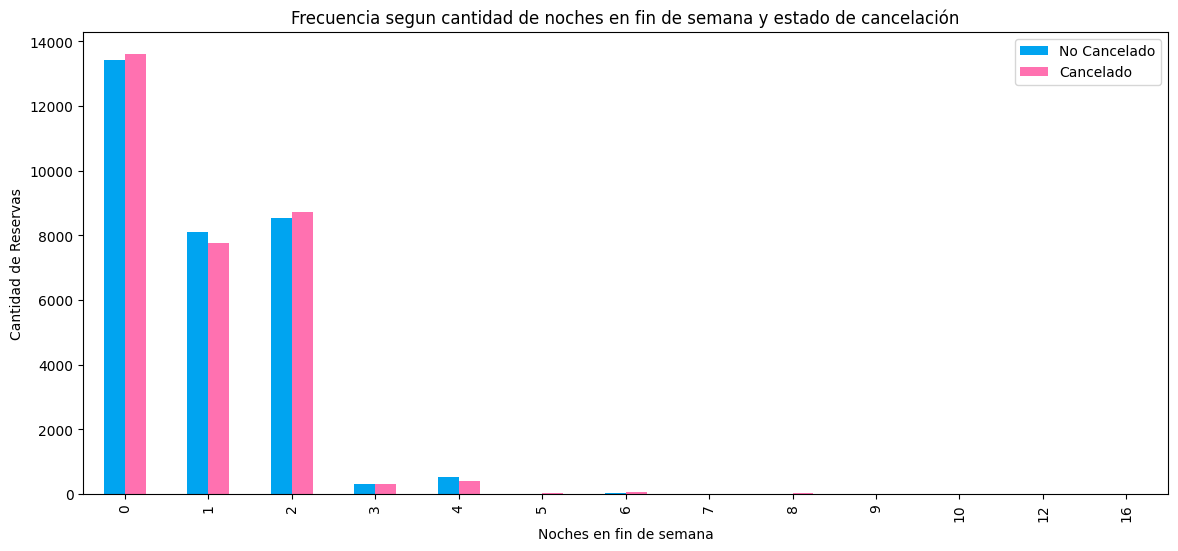

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="stays_in_weekend_nights", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun cantidad de noches en fin de semana y estado de cancelación",xlabel='Noches en fin de semana',ylabel='Cantidad de Reservas')

Podemos observar, que la mayoria de reservas posee entre 0 y 2 días en el fin de semana, lo cual significa que solo pasan un fin de semana o ni siquiera uno. Esto es lógico, ya que para tener mas de 2 días, la reserva debe durar mínimo 10 días, lo cual es una estadía larga para un hotel. 

#### Reservas con noches entre semana

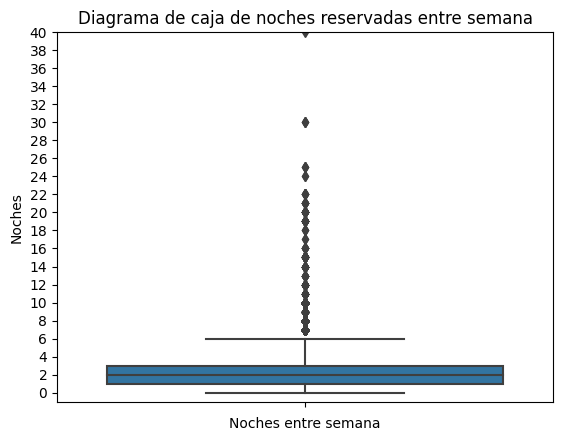

In [ ]:
sns.boxplot(data=df_trabajo, y="stays_in_week_nights")
plt.xlabel("Noches entre semana")
plt.ylabel("Noches")
plt.title("Diagrama de caja de noches reservadas entre semana")
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2)) #Intervalo de y
plt.ylim(-1, 40)
plt.show()

La mayoria de reservas son entre 1 y 3 noches. Siendo las reservas mayores a 6 valores atipicos en especial habiendo una reserva con 40 noches

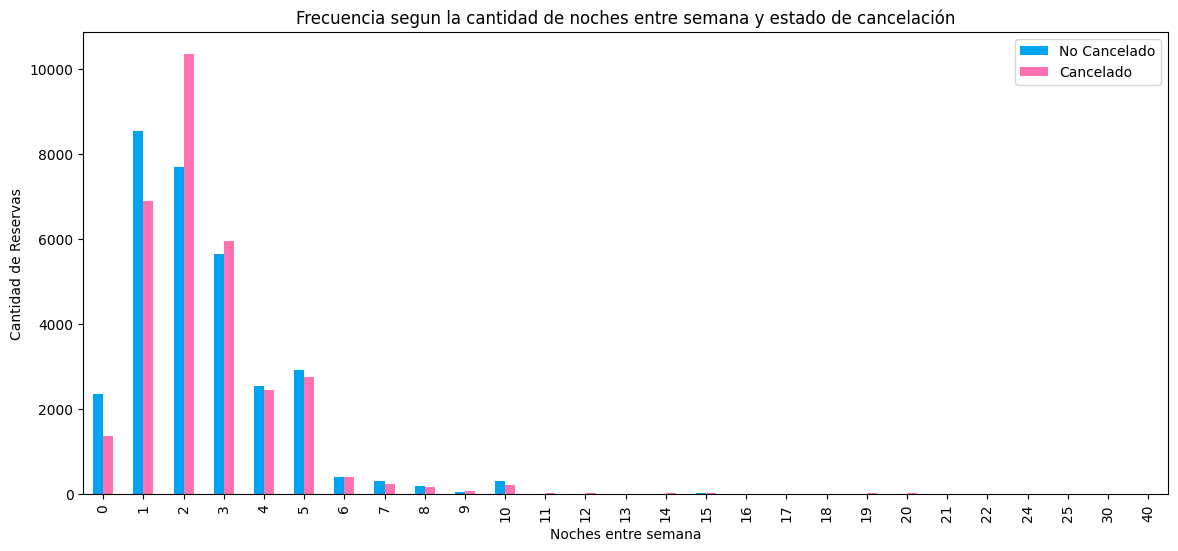

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="stays_in_week_nights", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun la cantidad de noches entre semana y estado de cancelación",xlabel='Noches entre semana',ylabel='Cantidad de Reservas')

En el grafico podemos notar que la reservas que son con cero o una noche parecen ser menos canceladas, mientras que la reservas con 2 noches de semana parace ser las mas cancelada. Despues las reservas parecen ser canceladas y no por igual, a excepcion del grupo de 10 noches que parece que se cancelan menos de lo normal

Algo que despues podemos fijarnos es si la reservas con 0 noches es solo por el dia o se quedan el fin de semana y como afecta eso a la cancelacion de la reserva

#### Adultos, niños y bebes

Mediante el análisis de los gráficos de tipo Box-Plot vamos a intentar identificar outliers univariados.

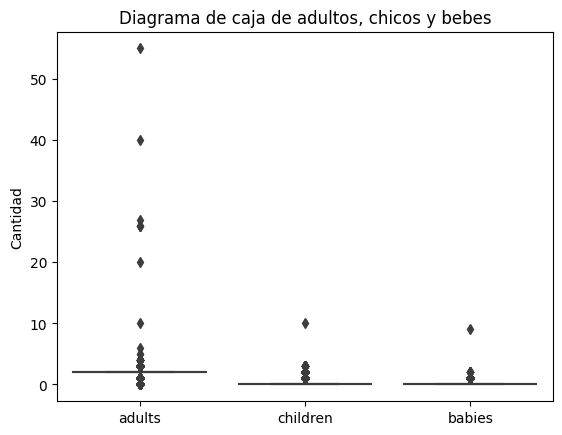

In [ ]:
sns.boxplot(data=df_trabajo[["adults","children","babies"]])
plt.ylabel("Cantidad")
plt.title("Diagrama de caja de adultos, chicos y bebes")
plt.show()

Viendo el grafico podemos notar que las reservas suelen tener en su mayoria la misma cantidad de adultos,chicos y bebes

Depues analisisando la distribucion con el target

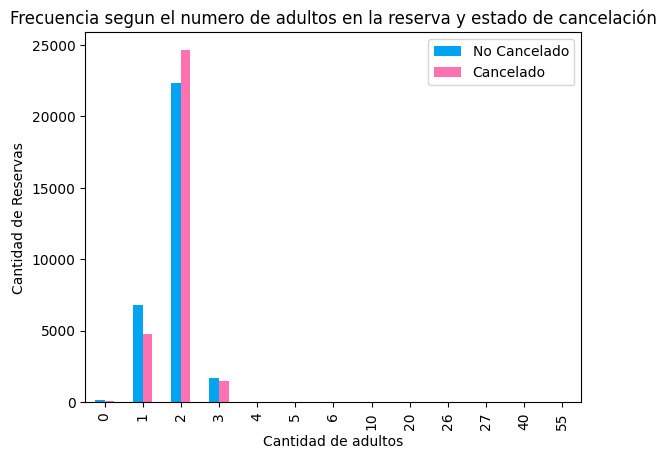

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="adults", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

grf = pivot_table.plot.bar(stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de adultos en la reserva y estado de cancelación",xlabel='Cantidad de adultos',ylabel='Cantidad de Reservas')

La gran mayoria de reservas se hacen con 2 adultos con mas cancelaciones, seguido de reservas con 1 adulto que se suelen no ser cancelados

Tambien podemos ver que hay una cantidad de reservas con 0 adultos, aunque es posible en la gran mayotia de paises no se puede reservar sin ser mayor.

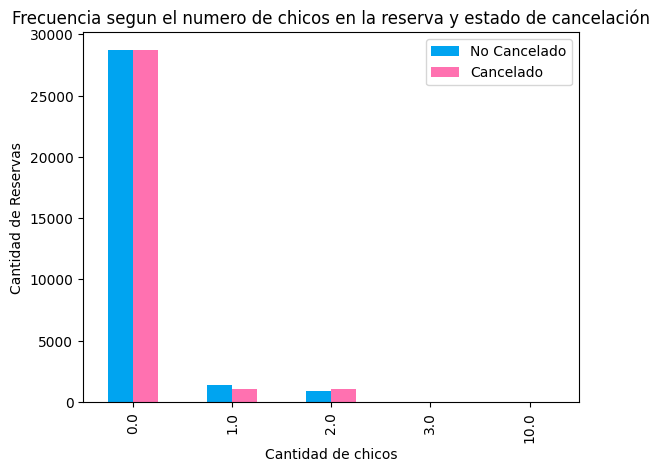

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="children", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]
grf = pivot_table.plot.bar(stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de chicos en la reserva y estado de cancelación",xlabel='Cantidad de chicos',ylabel='Cantidad de Reservas')

Es claro que la gran mayoría de reservas no tienen niños, pero sin importar su presencia y cantidad, en cualquier caso, no existe un patrón visible respecto a la tasa de cancelación. Por ende, esta variable es probable que sea descartada.

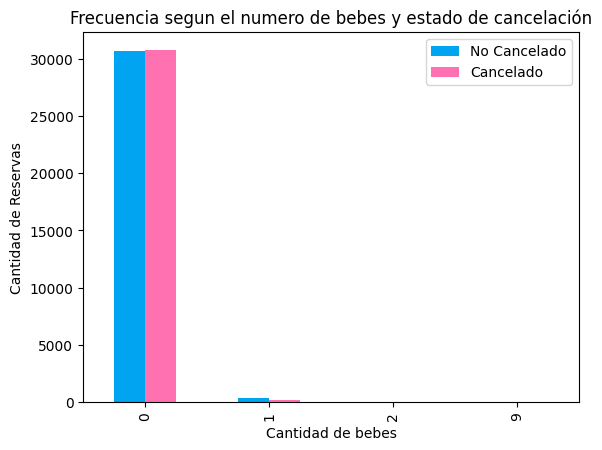

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="babies", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]
grf = pivot_table.plot.bar(stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de bebes y estado de cancelación",xlabel='Cantidad de bebes',ylabel='Cantidad de Reservas')

Ocurre tal cual como con los niños.

#### Cancelaciones Previas

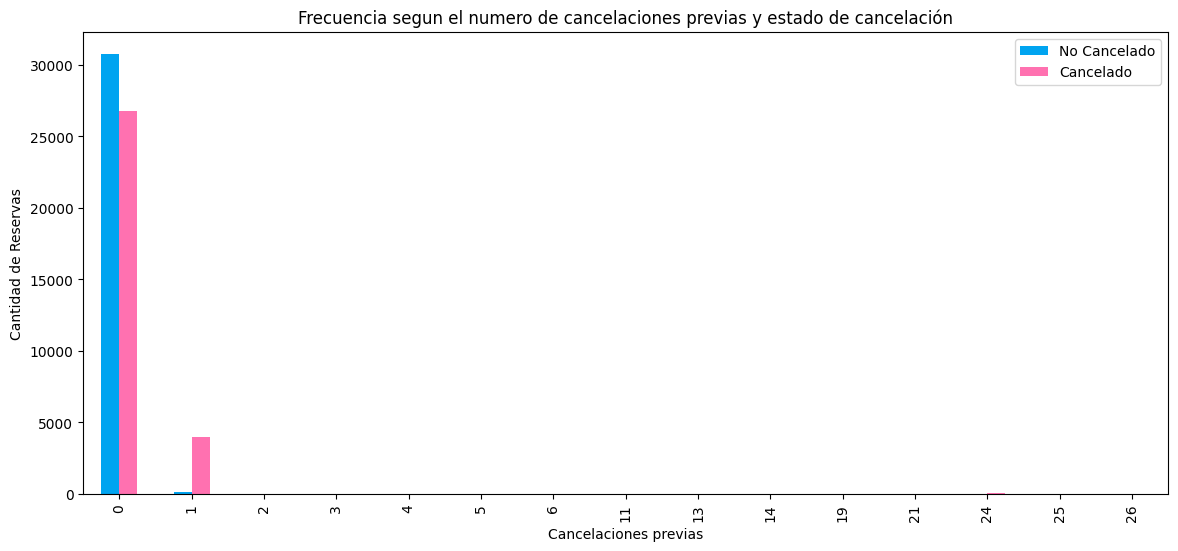

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="previous_cancellations", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de cancelaciones previas y estado de cancelación",xlabel='Cancelaciones previas',ylabel='Cantidad de Reservas')

La mayoria de las reservas no tienen cancelaciones previas y en ellas se suelen cancelar menos, mientras que las reservas que tienen una cancelacion previas son canceladas casi que siempre

#### Reservas anteriores no canceladas

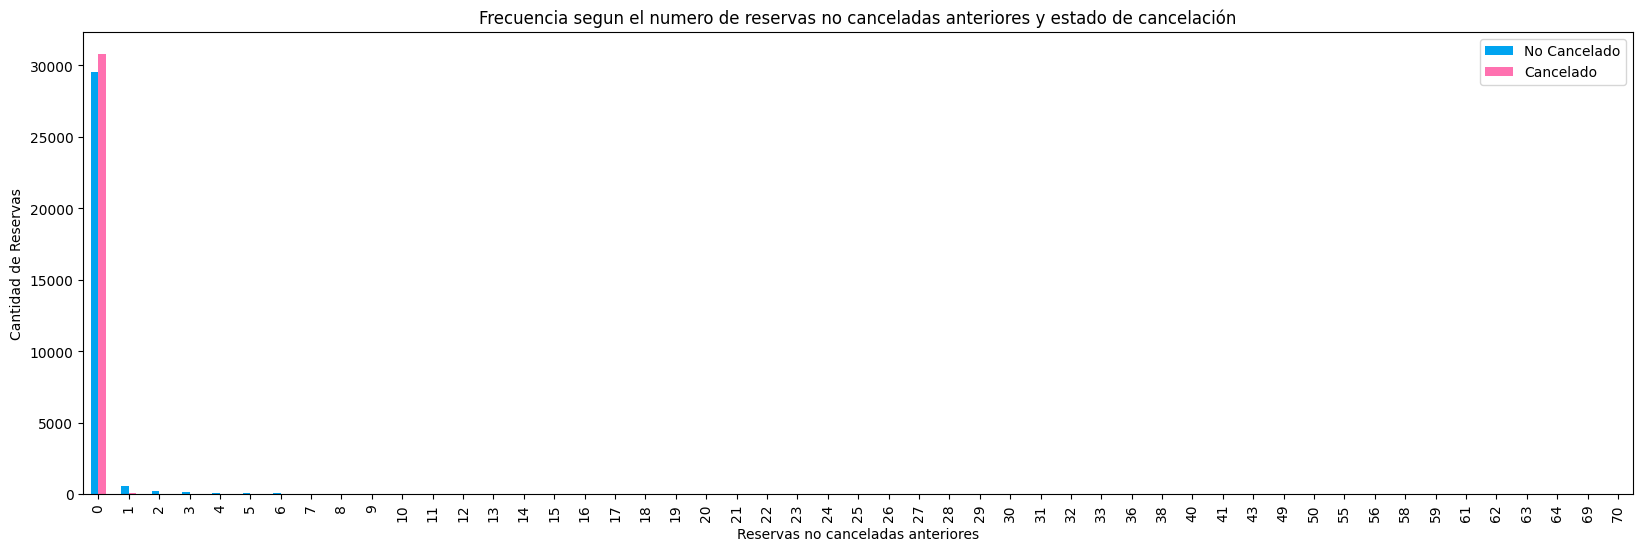

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="previous_bookings_not_canceled", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(20, 6)) # Set the figure size
grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de reservas no canceladas anteriores y estado de cancelación",xlabel='Reservas no canceladas anteriores',ylabel='Cantidad de Reservas')

In [ ]:
pivot_table

No Cancelado  Cancelado
previous_bookings_not_canceled                         
0                                      29568      30807
1                                        577         54
2                                        235         23
3                                        140         11
4                                         99          4
5                                         74          5
6                                         41          3
7                                         25          4
8                                         26          3
9                                         23          0
10                                        18          6
11                                        17          4
12                                        12          2
13                                        17          2
14                                        11          1
15                                         7          2
16                                         4          0
17                                         7          1
18                                         7          0
19                                         4          0
20                                         5          0
21                                         4          0
22                                         5          0
23                                         2          0
24                                         6          0
25                                         5          5
26                                         4          1
27                                         2          1
28                                         4          0
29                                         2          1
30                                         1          0
31                                         1          0
32                                         1          0
33                                         1          0
36                                         1          0
38                                         1          0
40                                         1          0
41                                         1          0
43                                         1          0
49                                         1          0
50                                         1          0
55                                         1          0
56                                         1          0
58                                         1          1
59                                         1          0
61                                         1          0
62                                         1          0
63                                         1          0
64                                         1          0
69                                         1          0
70                                         1          0

Notamos que a mientras mas reservas anteriores no canceladas posee el cliente que reserva, aparece un patron muy marcado en el que pocas veces cancelan la reserva. A pesar de que los casos son pocos, no podemos considerarlo irrelevante, ya que en la gran mayoría de casos, se respeta este patrón mencionado.

#### Cambios de Reserva

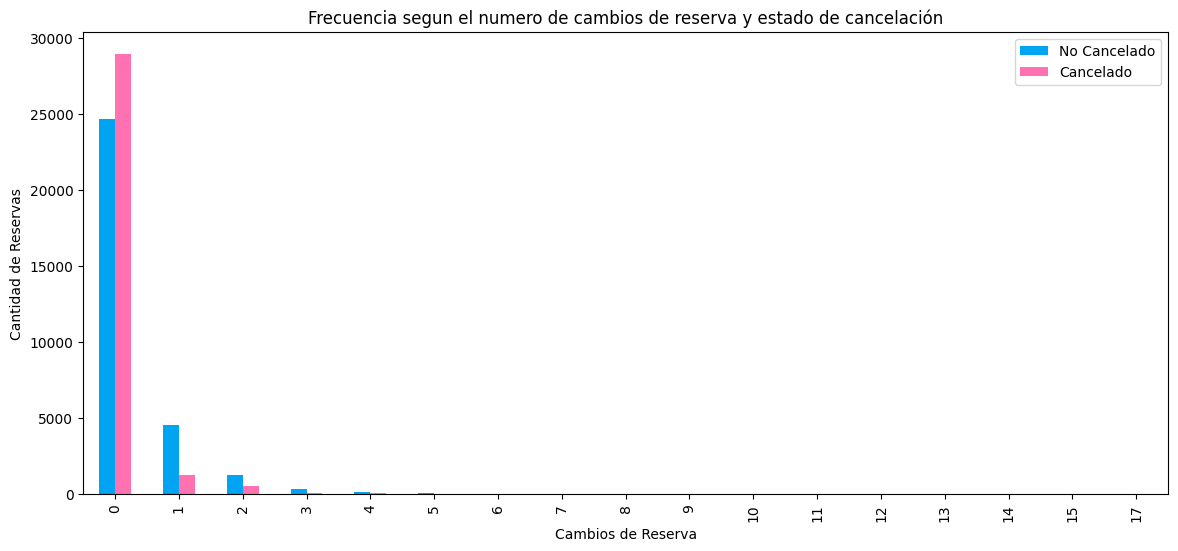

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="booking_changes", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de cambios de reserva y estado de cancelación",xlabel='Cambios de Reserva',ylabel='Cantidad de Reservas')

Al igual que en caso anterior, notamos que a medida que aumentan los cambios de reserva, disminuyen notoriamente las chances de que el cliente cancele la reserva. De todas maneras, se repite el hecho de que los casos son pocos, pero la tendencia es notoria.

#### Días en lista de espera

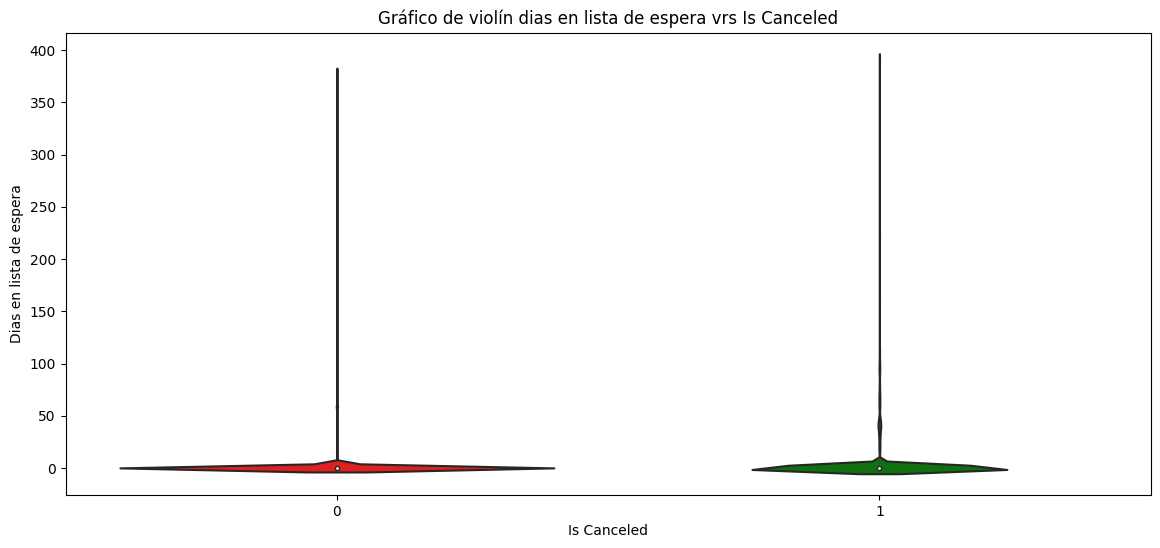

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.violinplot(x="is_canceled", y="days_in_waiting_list", data=df_trabajo,palette=["r", "g"]).set(title="Gráfico de violín dias en lista de espera vrs Is Canceled",xlabel='Is Canceled',ylabel='Dias en lista de espera') 

Podemos notar que la gran mayoria de datos se encuentra sobre 0, a continuacion vamos a fijarnos las cantidad de reservas que tienen algun dia en la lista de espera

In [ ]:
(df_trabajo['days_in_waiting_list'] > 0).value_counts()

False    59678
True      2235
Name: days_in_waiting_list, dtype: int64

Solamente 2235 datos tienen dias en la lista de espera, ahora vamos a ver su distrubucion con el target para fijarnos si es relevante

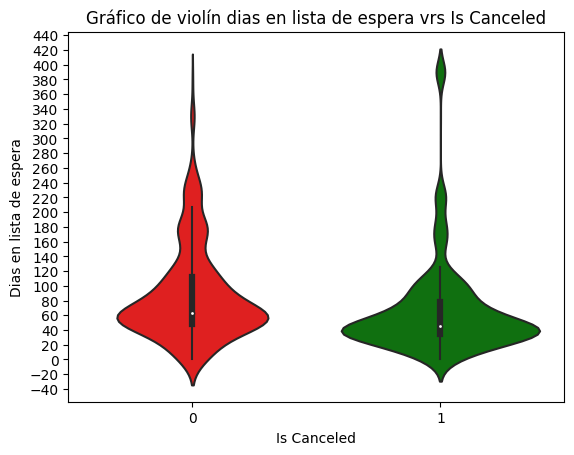

In [ ]:
df_espera = df_trabajo[df_trabajo['days_in_waiting_list'] > 0]
grf = sns.violinplot(x="is_canceled", y="days_in_waiting_list", data=df_espera,palette=["r", "g"]).set(title="Gráfico de violín dias en lista de espera vrs Is Canceled",xlabel='Is Canceled',ylabel='Dias en lista de espera')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.show()

Hay una diferencia en la distribucion, porque notamos que las reservas canceladas se acumulan mas sobre los 40 dias de espera, mientras que las resevas no canceladas tienen manyor densidad alrededor de los 60 días. A pesar de esto, no consideramos de gran relevancia este dato, porque no existe una diferencia notable en sus distribuciones cuando se compara contra el target.


#### ADR

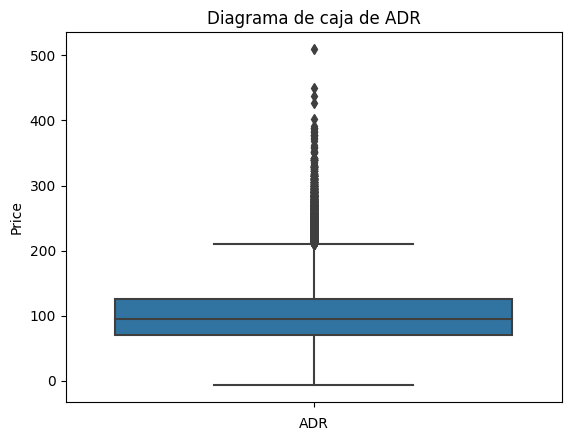

count    61913.000000
mean       102.383773
std         47.757640
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

In [ ]:
sns.boxplot(data=df_trabajo, y=df_trabajo["adr"])
plt.xlabel("ADR")
plt.ylabel("Price")
plt.title("Diagrama de caja de ADR")
plt.show()
df_trabajo["adr"].describe()

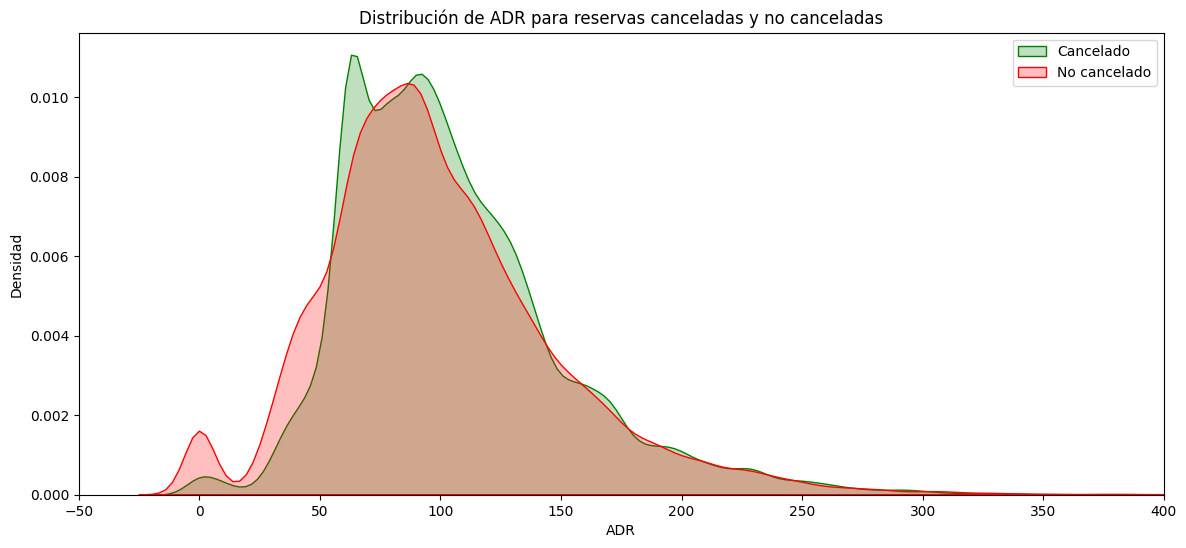

In [ ]:
df_cancelled = df_trabajo[df_trabajo['is_canceled'] == 1]
df_not_cancelled = df_trabajo[df_trabajo['is_canceled'] == 0]

fig, ax = plt.subplots(figsize=(14, 6))

# Plot de la densidad de ADR para reservas canceladas y no canceladas
sns.kdeplot(df_cancelled['adr'], fill=True, color="g", label="Cancelado")
sns.kdeplot(df_not_cancelled['adr'], fill=True, color="r", label="No cancelado")

# Configuración de la gráfica
plt.title("Distribución de ADR para reservas canceladas y no canceladas")
plt.xlabel("ADR")
plt.ylabel("Densidad")
plt.legend(loc="upper right")

# Mostrar la gráfica
plt.xlim(-50, 400)
plt.show()

Primero que nada podemos notar que entre 0-50 se suele cancelar menos las reservas, apartir de eso hay un pico de reservas canceladas. Despues entre 100 y 150 notamos que hay mayor cantidad de reservas canceladas. En el resto de precios no se nota una gran diferencia entre reservas canceladas y no canceladas.

Otro cosa a notar es que hay una acumulacion de datos en 0 que puede estar mal cargados.




#### Espacios de estacionamiento

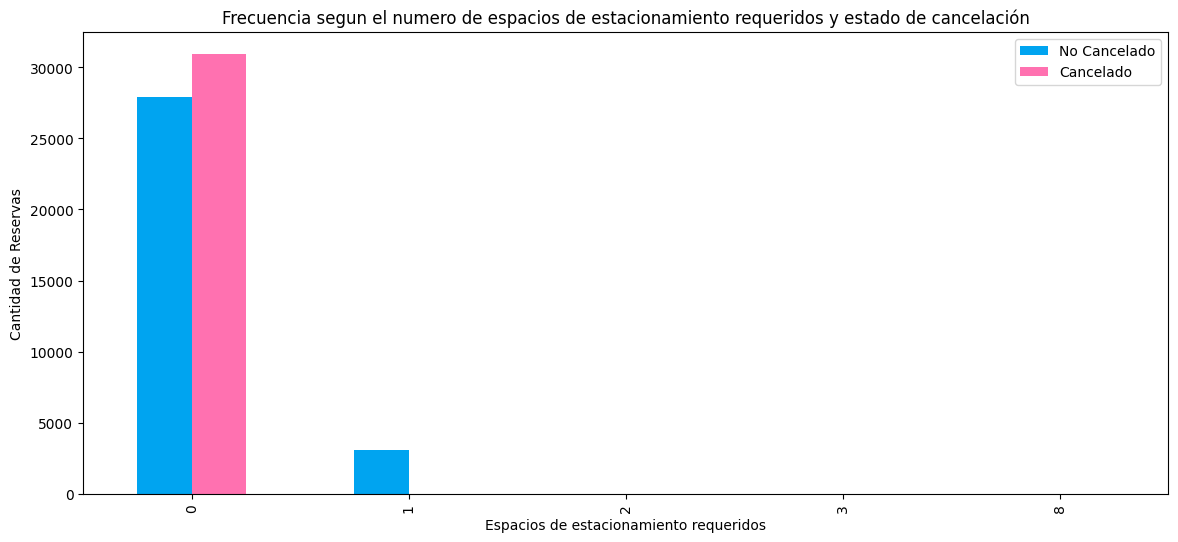

In [ ]:
pivot_table = pd.pivot_table(df, index="required_car_parking_spaces", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de espacios de estacionamiento requeridos y estado de cancelación",xlabel='Espacios de estacionamiento requeridos',ylabel='Cantidad de Reservas')

La gran mayoria de las reservas no se pide estacionamiento y de ellas mas son mas cancelada, las reservas ya con un espacio de estacionamiento requerido cancelan en mucho menor medida.

#### Pedidos especiales

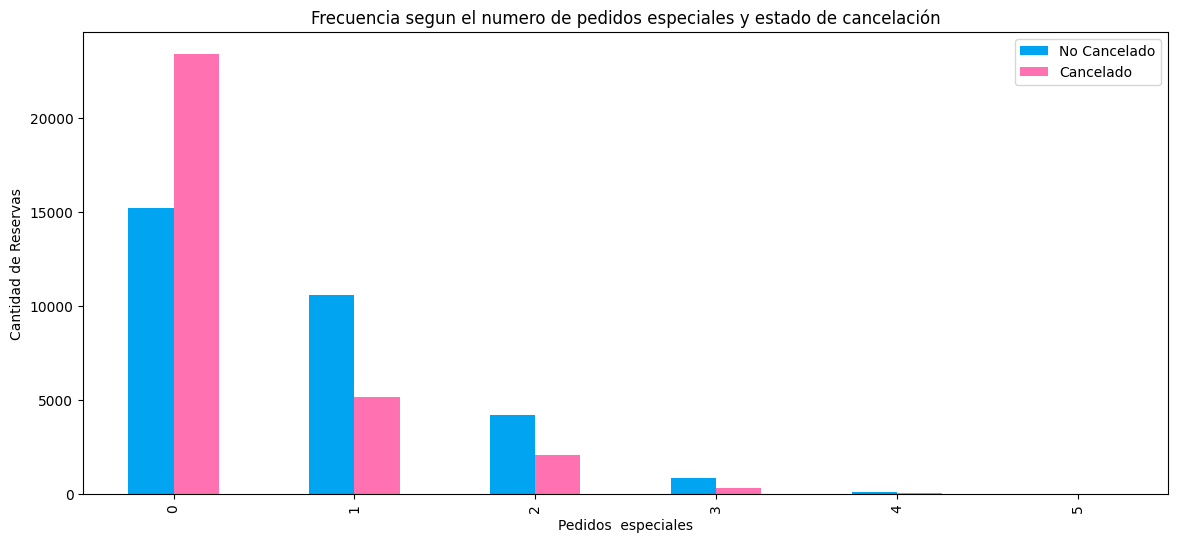

In [ ]:
pivot_table = pd.pivot_table(df, index="total_of_special_requests", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de pedidos especiales y estado de cancelación",xlabel='Pedidos  especiales',ylabel='Cantidad de Reservas')

Podemos notar que cuando las reservas tienen un pedido especial menos chance tiene de ser cancelada y cuando no tienen es al revez.

---

### Variables categoricas

#### Hotel

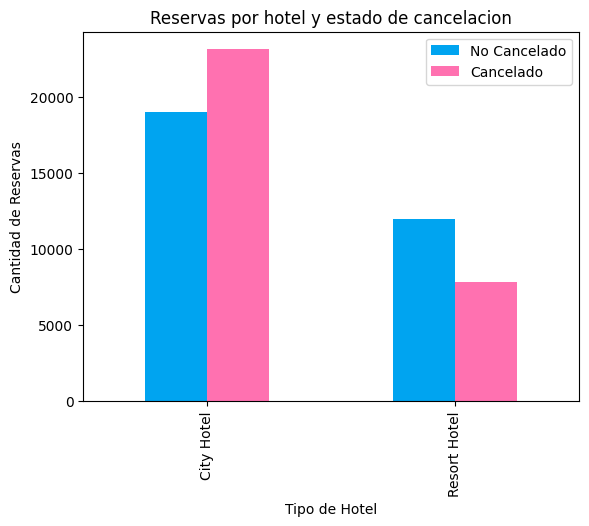

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="hotel", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]


grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"], title="Reservas por hotel y estado de cancelacion",xlabel='Tipo de Hotel',ylabel='Cantidad de Reservas')

Notamos que hay una mayor cantidad de reservas en los hoteles de ciudad, pero su tasa de cancelación es notoriamente mayor. Mientras que los hoteles resort poseen menos reservas, pero las cancelaciones son claramente menos frecuentes.
Esto es lógico, ya que generalmente las reservas de resort, corresponde a vacaciones (generalmente planificadas con tiempo). Caso contrario, las reservas en hoteles de ciudad, podemos pensar que corresponden a viajes laborales, los cuales tienen mayor posibilidad de ser cancelados.

#### Mes de llegada de la reserva

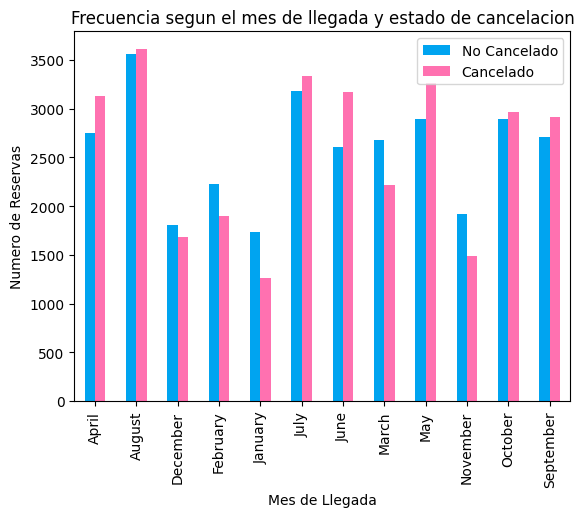

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="arrival_date_month", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]


grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el mes de llegada y estado de cancelacion",xlabel='Mes de Llegada',ylabel='Numero de Reservas') 

Vemos que la cantidad de reservas por mes es variable, pero la tasa de cancelacion es muy proxima a un 50-50 en todos los meses, por lo que no vemos un patrón útil en esta variable. 

#### Tipo de comida

Los posibles valores de meal 

- Undefined/SC – sin comidad
- BB – Desayuno y Cama
- HB – Desayuno y otra comida
- FB – Todas las comidas del dia

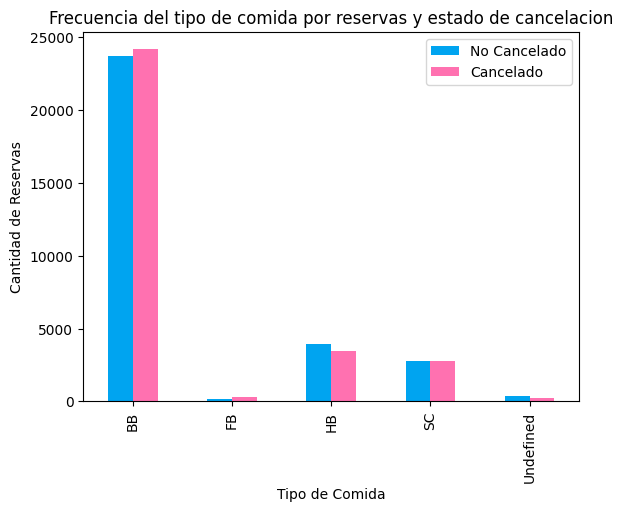

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="meal", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]

grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"],title="Frecuencia del tipo de comida por reservas y estado de cancelacion",xlabel='Tipo de Comida',ylabel='Cantidad de Reservas')


Podemos notar que gran parte de las reservas son solo con desayuno y que no hay gran diferencia entre las reservas canceladas y las no canceladas por el tipo de comida de la reserva

#### País

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="country", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]
pivot_table["Total"] = pivot_table["No Cancelado"] + pivot_table["Cancelado"]
pivot_table

No Cancelado  Cancelado  Total
country                                
AGO                62        138    200
ALB                 5          2      7
AND                 1          4      5
ARE                 2         31     33
ARG                74         32    106
...               ...        ...    ...
VGB                 0          1      1
VNM                 1          1      2
ZAF                28         29     57
ZMB                 1          1      2
ZWE                 2          0      2

[149 rows x 3 columns]

Viendo la distribucion podemos ver que hay muchos paises con menos de 100 reservas lo cuales no son valores atipicos pero si va a ensuciar el grafico en esta primera estacia.

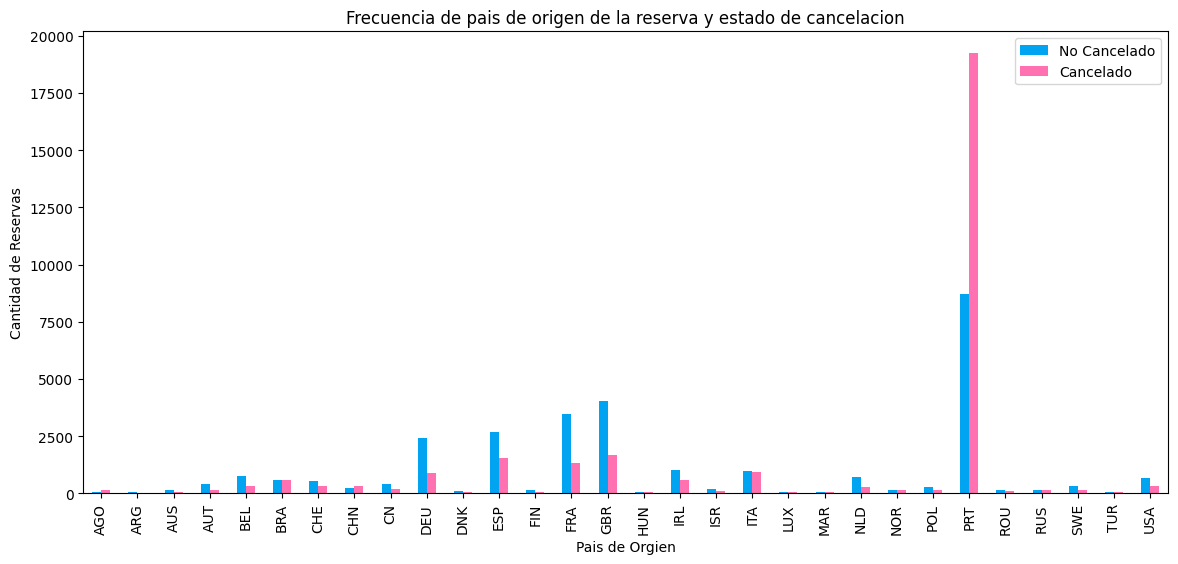

In [ ]:
pivot_table = pivot_table.loc[pivot_table["Total"]>=100]
fig, ax = plt.subplots(figsize=(14, 6))
pivot_table[["No Cancelado","Cancelado"]].plot.bar(ax=ax,color=["#00a4f0", "#ff71b0"],title="Frecuencia de pais de origen de la reserva y estado de cancelacion",xlabel='Pais de Orgien',ylabel='Cantidad de Reservas')
plt.show()

Algo que se va encarar despues en datos faltante y valores atipicos es meter todos los paises con reservas menores a x para seguir teniendo en cuanta esos valores

#### Canal de distribución

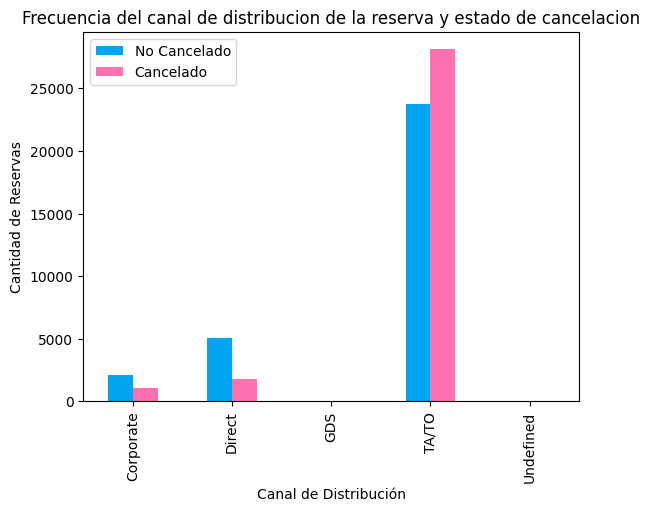

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="distribution_channel", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]

grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"],title="Frecuencia del canal de distribucion de la reserva y estado de cancelacion",xlabel='Canal de Distribución',ylabel='Cantidad de Reservas') 

Observamos buenos patrones para la toma de decision con nuestro target. Aunque será complicado de modelar en los casos "GDS" y en los casos "INDEFINIDOS".

#### Huesped repetido

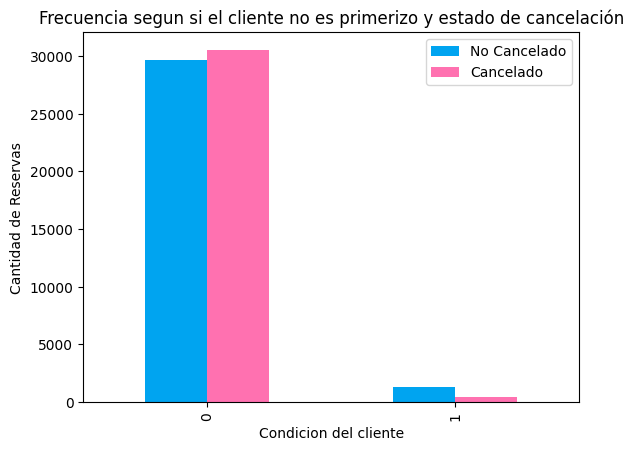

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="is_repeated_guest", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]


grf = pivot_table.plot.bar(stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun si el cliente no es primerizo y estado de cancelación",xlabel='Condicion del cliente',ylabel='Cantidad de Reservas')
plt.show()

No hallamos ningún patrón notorio que nos permita predecir nuestro target, cuando el cliente se hospeda por primera vez. Aunque si el cliente repite, notamos una mayor tasa de no cancelación, pero no tan notoria como para estar en un modelo principal.

#### Tipo de cuarto reservado

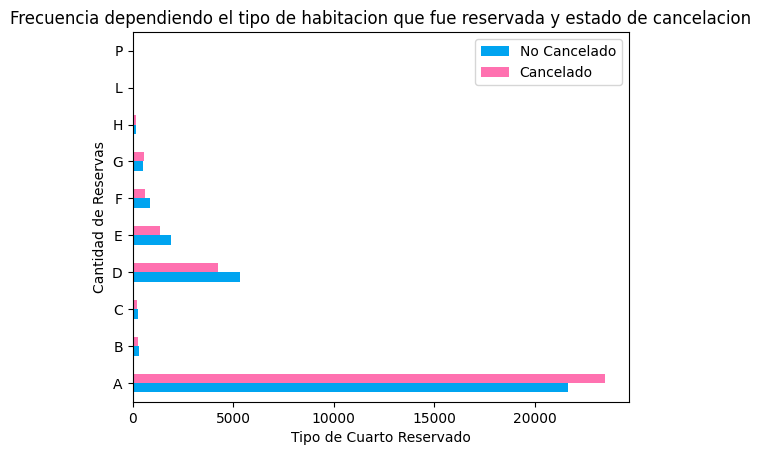

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="reserved_room_type", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]


grf = pivot_table.plot.barh(color=["#00a4f0", "#ff71b0"],title="Frecuencia dependiendo el tipo de habitacion que fue reservada y estado de cancelacion",xlabel='Tipo de Cuarto Reservado',ylabel='Cantidad de Reservas')  

No notamos ningún patron en ningun caso, por lo que probablemente sea considerado una variable irrelevante de manera individual para nuestro modelo.

#### Tipo de cuarto asignado

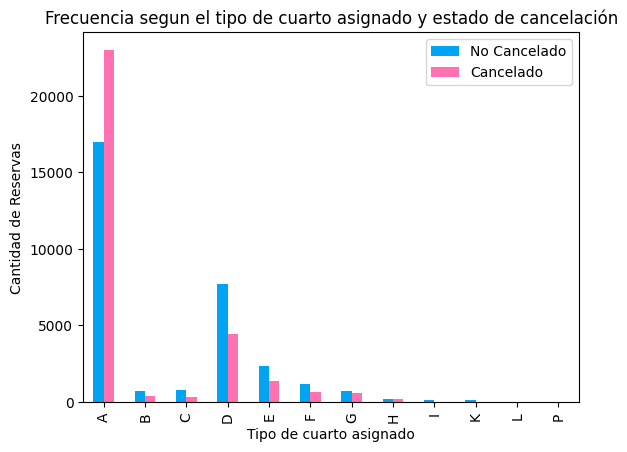

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="assigned_room_type", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

grf = pivot_table.plot.bar(stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el tipo de cuarto asignado y estado de cancelación",xlabel='Tipo de cuarto asignado',ylabel='Cantidad de Reservas')

Se nota un patrón en algunos casos, pero consideramos que será dificil de modelar, y quizas no tenga tanto peso a la hora de predecir nuestro target.

#### Tipo de Deposito

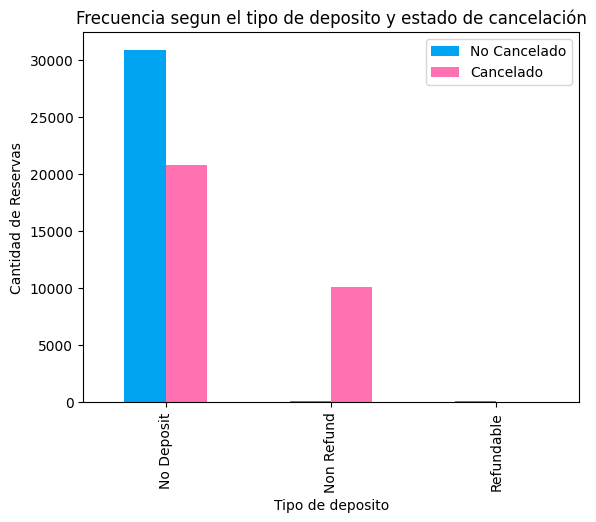

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="deposit_type", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

grf = pivot_table.plot.bar(stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el tipo de deposito y estado de cancelación",xlabel='Tipo de deposito',ylabel='Cantidad de Reservas')

Se puede notar una gran diferencia entre las reservas cancelada en las reservas sin deposito(cancelan menos) y las no reembolsable(cancelan mas). No hay una cantidad significativas de reservas reembolsable pero aparenta que se suelen no cancelar

#### Agente

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="agent", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]
pivot_table["Total"] = pivot_table["No Cancelado"] + pivot_table["Cancelado"]
pivot_table["Porcentaje de Cancelados"] = np.rint(pivot_table["Cancelado"]/pivot_table["Total"]*100)
pivot_table

No Cancelado  Cancelado  Total  Porcentaje de Cancelados
agent                                                          
1.0             753       3671   4424                      83.0
2.0              45         22     67                      33.0
3.0             212        527    739                      71.0
4.0               8         23     31                      74.0
5.0              72        107    179                      60.0
...             ...        ...    ...                       ...
509.0             5          2      7                      29.0
526.0             1          0      1                       0.0
527.0            12          0     12                       0.0
531.0             7         27     34                      79.0
535.0             1          0      1                       0.0

[296 rows x 4 columns]

Analisando la distribucion en la tabla se nota que para distintos agentes hay una diferencia entre los cancelados y no los no cancelados pero en una primera instancia no lo vamos a tener en cuenta ya que no creemos que afecte a la cancelacion de una reserva

#### Compañía

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="company", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]
pivot_table["Total"] = pivot_table["No Cancelado"] + pivot_table["Cancelado"]
pivot_table["Porcentaje de Cancelados"] = np.rint(pivot_table["Cancelado"]/pivot_table["Total"]*100)
pivot_table

No Cancelado  Cancelado  Total  Porcentaje de Cancelados
company                                                          
9.0                13          1     14                       7.0
10.0                1          0      1                       0.0
12.0                7          0      7                       0.0
14.0                4          1      5                      20.0
16.0                2          0      2                       0.0
...               ...        ...    ...                       ...
528.0               1          0      1                       0.0
530.0               1          0      1                       0.0
539.0               2          0      2                       0.0
541.0               1          0      1                       0.0
543.0               0          2      2                     100.0

[276 rows x 4 columns]

Podemos ver en la tabla que hay muy pocas reservas con compania y esto es porque la gran mayoria no tiene valor como se ve a continuacion

In [ ]:
df_trabajo["company"].isna().value_counts()

True     58761
False     3152
Name: company, dtype: int64

Debido a esto no vamos a graficar esta variable y la vamos a considerar irrelevante apesar de que la cantidad de reservas canceladas vaira ampliamente entre companias

#### Tipo de cliente

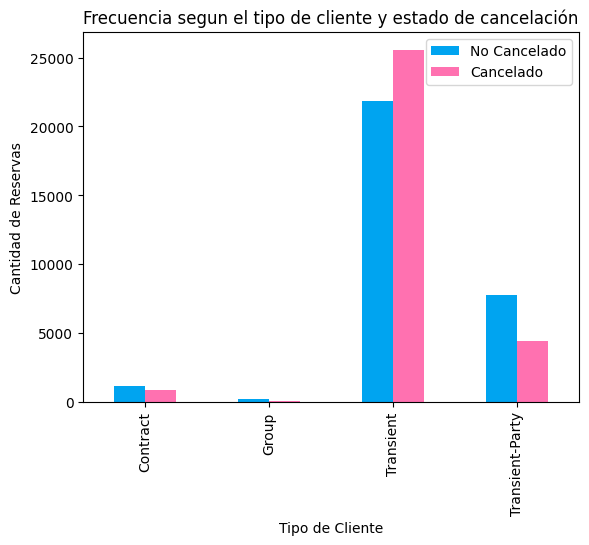

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="customer_type", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]


grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el tipo de cliente y estado de cancelación",xlabel='Tipo de Cliente',ylabel='Cantidad de Reservas')

Notamos un patrón en algunos casos, pero es probable que sea dificil de modelar, por lo que probablemente no sea utilizado en un modelo con variables que posean patrones muy marcados.

#### Se canceló **(TARGET)**

Toma los valores 0 y 1 para indicar si se cancelo, siendo 1 el caso afirmativo.

In [ ]:
df_trabajo["is_canceled"].value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

Notamos que en el dataframe hay una cantidad equilibrada de reservas canceladas y no canceladas

## Pairplots

En esta parte hicimos unos graficos (pairplots) para asi poder analizar alguna relacion entre las variables respecto al target (is_canceled), que nos ayude a ver algo relevante que no hayamos podido ver en los demas graficos.

(array([0. , 0.5, 1. , 1.5]),
 [Text(1, 0.0, '0.0'),
  Text(1, 0.5, '0.5'),
  Text(1, 1.0, '1.0'),
  Text(1, 1.5, '1.5')])

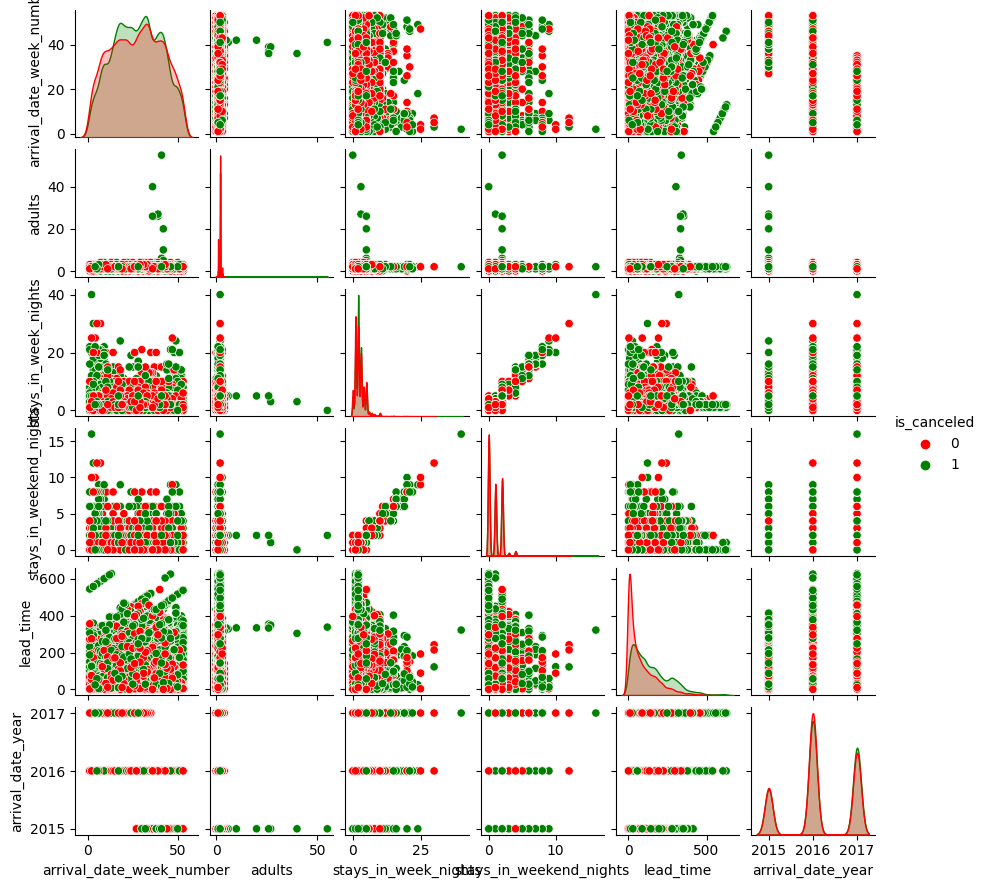

In [ ]:
sns.pairplot(data=df_trabajo, hue="is_canceled", vars={"lead_time","arrival_date_year","arrival_date_week_number","stays_in_weekend_nights","stays_in_week_nights","adults"}, palette=["r","g"],height=1.5)
plt.xticks(rotation=180)
plt.yticks(rotation=180)

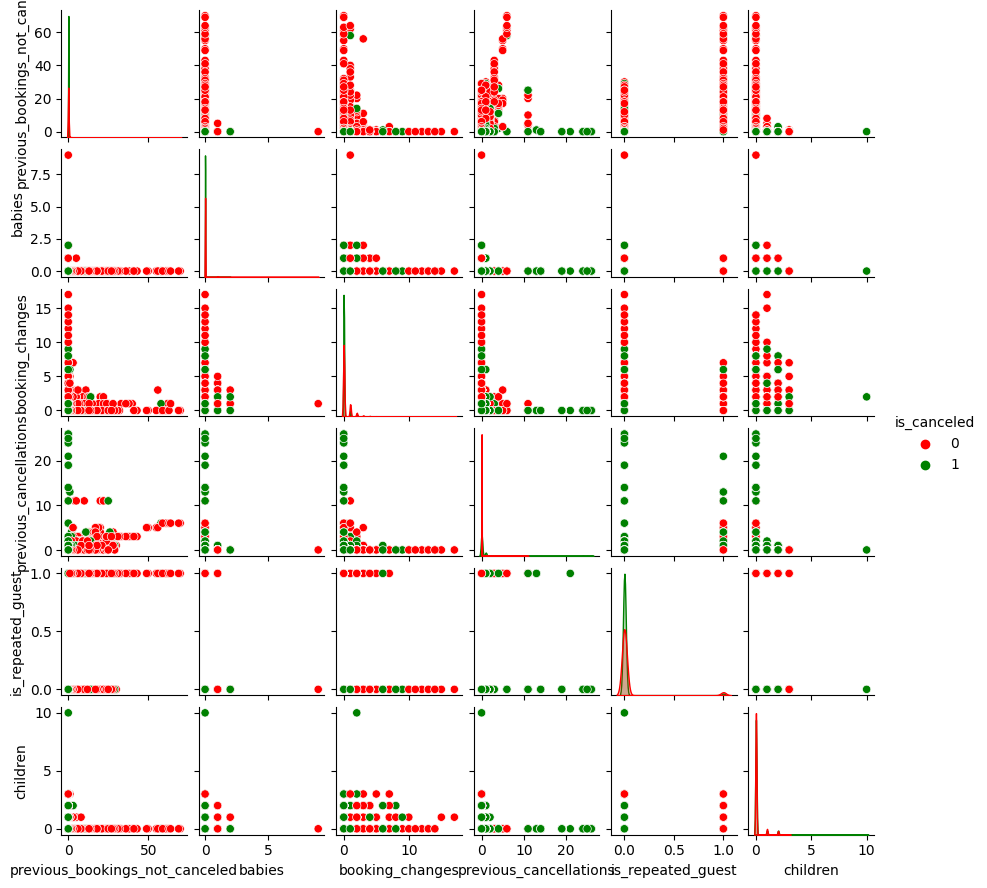

In [ ]:
sns.pairplot(data=df_trabajo, hue="is_canceled", vars={"children","babies","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes"}, palette=["r","g"],height=1.5)

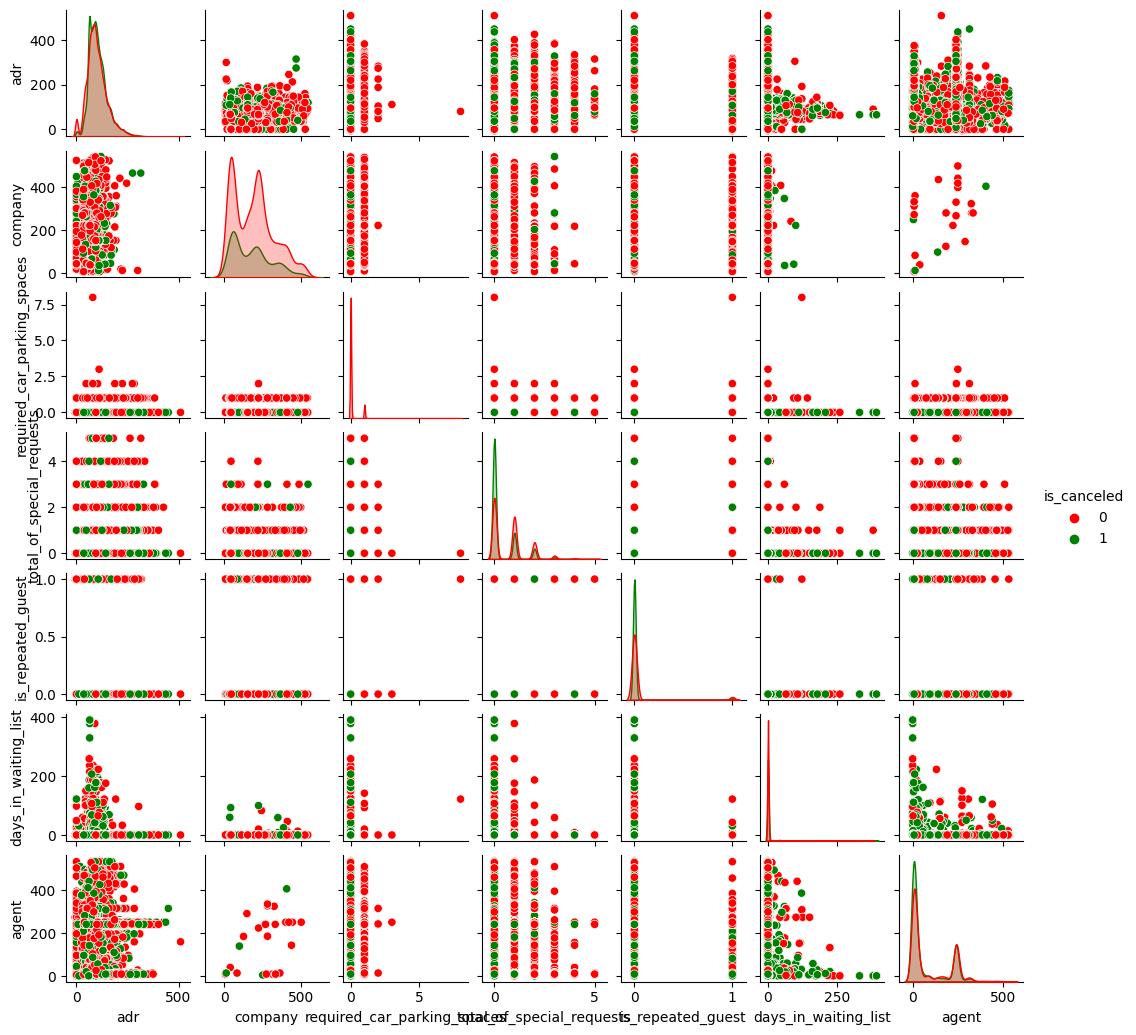

In [ ]:
sns.pairplot(data=df_trabajo, hue="is_canceled", vars={"agent","company","is_repeated_guest","days_in_waiting_list","adr","required_car_parking_spaces","total_of_special_requests"}, palette=["r","g"],height=1.5)

## Correlación


<ipython-input-327-b1f896216565>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tabla_de_correlacion = df_corr.corr(method="pearson")


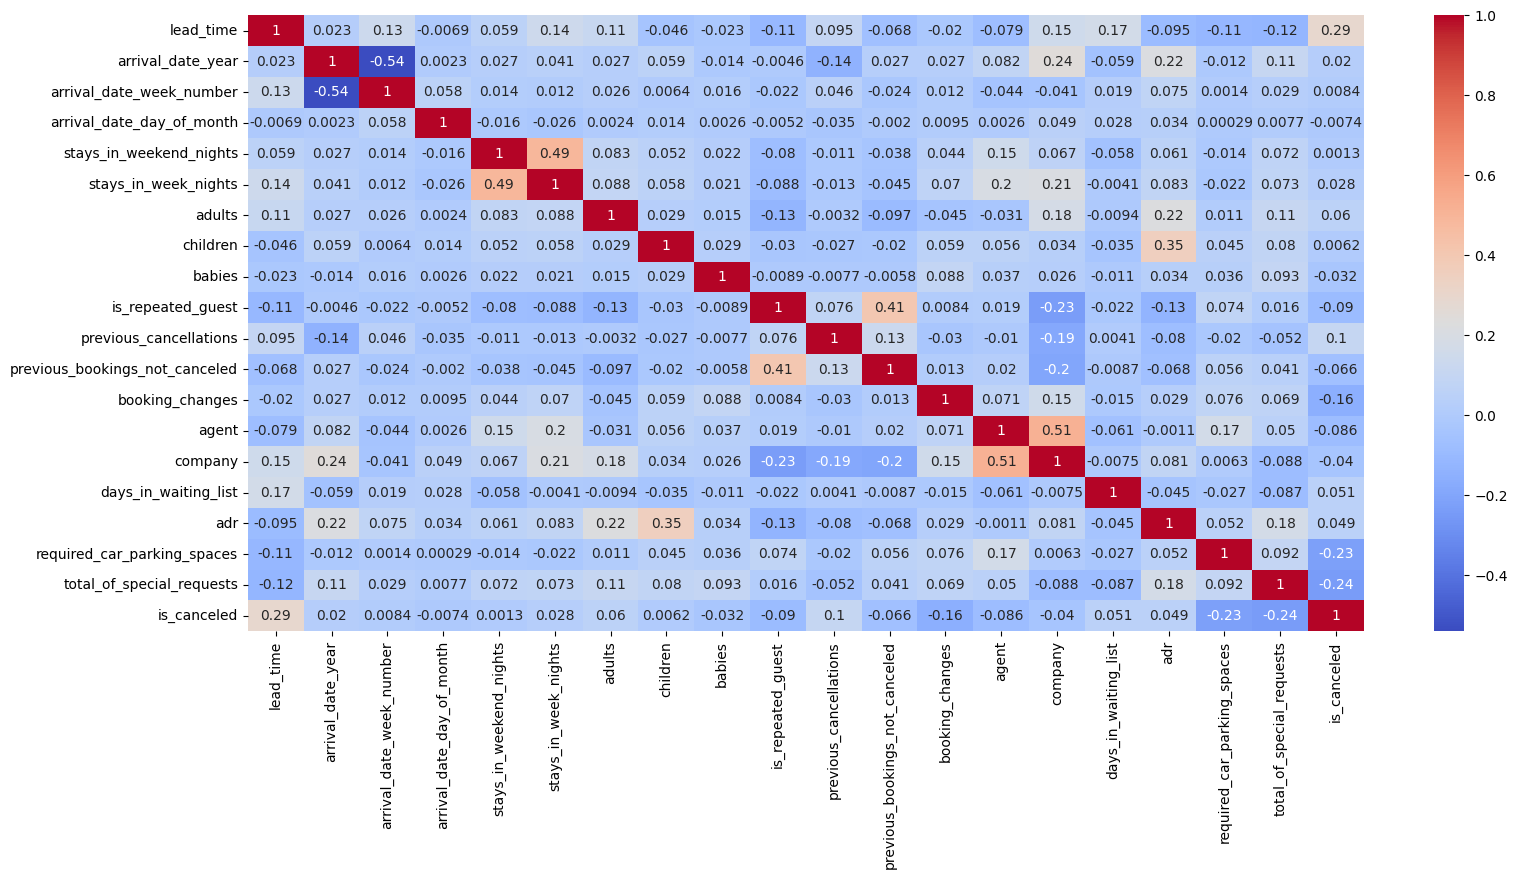

In [ ]:
# Agente y Company son irrelevantes para la correlacion de pearson ya que son variables categoricas por ser ids y su numero no tiene relevancia mas que indicar que es unico y que esta presente
df_corr = df_trabajo.copy()
tabla_de_correlacion = df_corr.corr(method="pearson")
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(tabla_de_correlacion, annot = True, cmap='coolwarm')
plt.show()

In [ ]:

from scipy.stats import chi2_contingency
import numpy as np

# seleccionar solo las variables categóricas
categorical_vars = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']

categorical_df = df[categorical_vars]

# calcular el coeficiente V de Cramer para cada par de variables
corr_matrix = pd.DataFrame(np.zeros((len(categorical_vars), len(categorical_vars))), index=categorical_vars, columns=categorical_vars)

for i in range(len(categorical_vars)):
    for j in range(len(categorical_vars)):
        if i != j:
            contingency_table = pd.crosstab(categorical_df[categorical_vars[i]], categorical_df[categorical_vars[j]])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            n = contingency_table.values.sum()
            phi2 = chi2/n
            r,k = contingency_table.shape
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            corr_matrix.iloc[i,j] = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
corr_matrix

hotel  arrival_date_month      meal   country  \
hotel                 0.000000            0.068047  0.324768  0.281592   
arrival_date_month    0.068047            0.000000  0.093084  0.081536   
meal                  0.324768            0.093084  0.000000  0.139681   
country               0.281592            0.081536  0.139681  0.000000   
market_segment        0.147513            0.089303  0.191610  0.194102   
distribution_channel  0.187523            0.065700  0.072325  0.085850   
reserved_room_type    0.336071            0.046214  0.102905  0.084231   
assigned_room_type    0.394950            0.026988  0.111013  0.068890   
deposit_type          0.195129            0.110760  0.107416  0.343098   
customer_type         0.035952            0.101739  0.137369  0.107383   

                      market_segment  distribution_channel  \
hotel                       0.147513              0.187523   
arrival_date_month          0.089303              0.065700   
meal                        0.191610              0.072325   
country                     0.194102              0.085850   
market_segment              0.000000              0.704981   
distribution_channel        0.704981              0.000000   
reserved_room_type          0.144569              0.101688   
assigned_room_type          0.131279              0.098793   
deposit_type                0.410829              0.095442   
customer_type               0.255266              0.078343   

                      reserved_room_type  assigned_room_type  deposit_type  \
hotel                           0.336071            0.394950      0.195129   
arrival_date_month              0.046214            0.026988      0.110760   
meal                            0.102905            0.111013      0.107416   
country                         0.084231            0.068890      0.343098   
market_segment                  0.144569            0.131279      0.410829   
distribution_channel            0.101688            0.098793      0.095442   
reserved_room_type              0.000000            0.851447      0.175553   
assigned_room_type              0.851447            0.000000      0.214018   
deposit_type                    0.175553            0.214018      0.000000   
customer_type                   0.105831            0.087348      0.104584   

                      customer_type  
hotel                      0.035952  
arrival_date_month         0.101739  
meal                       0.137369  
country                    0.107383  
market_segment             0.255266  
distribution_channel       0.078343  
reserved_room_type         0.105831  
assigned_room_type         0.087348  
deposit_type               0.104584  
customer_type              0.000000

##Variables Irrelevantes 

Después de analizar los gráficos individuales, el pairplot y las matrices de correlación, hemos llegado a la conclusión de que estas variables no presentan ningún patrón visible ni son modelables de ninguna manera, para predecir si una reserva será cancelada debido a su incidencia. Por lo tanto, consideramos que las siguientes variables son irrelevantes:s
  

- Arrival_date_month
- Arrival_date_week_number
- Arrival_date_year
- Agent
- Company
- previous_bookings_not_canceled
- days_in_waiting_list
- children
- babies
- meal
- is_repeated_guest

## Visualización de los datos: 

en esta sección se espera que puedan realizar una primera aproximación a los datos apoyándose en visualizaciones, por ejemplo: gráficos de
dispersión entre variables, histogramas, heatmaps, exploración de las columnas y
cualquier otro gráfico adicional que se considere útil justificando su utilización.

In [ ]:
df_visualizaciones = df.copy()

Text(50.72222222222221, 0.5, 'ADR')

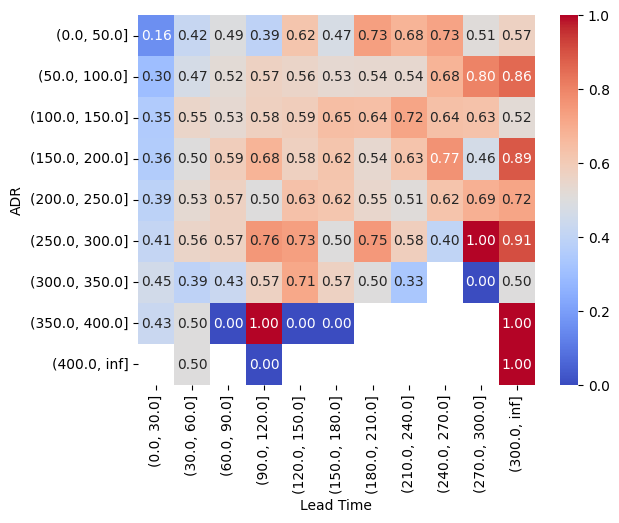

In [ ]:
df_visualizaciones['lead_time_range'] = pd.cut(df['lead_time'], bins=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, np.inf])
df_visualizaciones['adr_range'] = pd.cut(df['adr'], bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, np.inf])

pivot_df = df_visualizaciones.pivot_table(index='adr_range', columns='lead_time_range', values='is_canceled', aggfunc=np.mean)

sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')
plt.xlabel('Lead Time')
plt.ylabel('ADR')

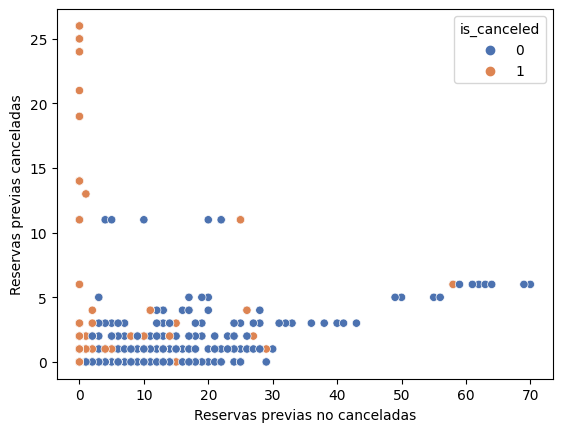

In [ ]:
#bookings cancelados con bookings no cancelados.

sns.scatterplot(data=df_visualizaciones, x="previous_bookings_not_canceled", y="previous_cancellations", hue="is_canceled", palette="deep")
plt.xlabel("Reservas previas no canceladas")
plt.ylabel("Reservas previas canceladas")
plt.title("")
plt.show()

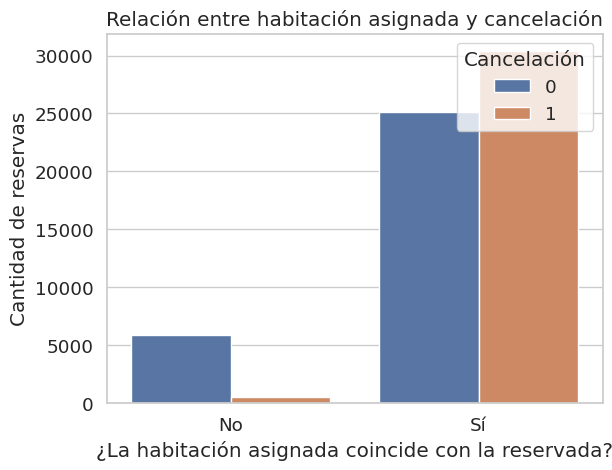

In [ ]:
#si cancelo o no si se le cambio el cuarto en relacion al que habian reservado.



sns.set(style="whitegrid", font_scale=1.2)

df_visualizaciones['habitacion_correcta'] = (df_visualizaciones['reserved_room_type'] == df_visualizaciones['assigned_room_type'])

sns.countplot(x='habitacion_correcta', hue='is_canceled', data=df_visualizaciones)
plt.title("Relación entre habitación asignada y cancelación")
plt.xlabel("¿La habitación asignada coincide con la reservada?")
plt.ylabel("Cantidad de reservas")
plt.xticks([False, True], ["No", "Sí"])
plt.legend(title="Cancelación", loc='upper right')
plt.show()

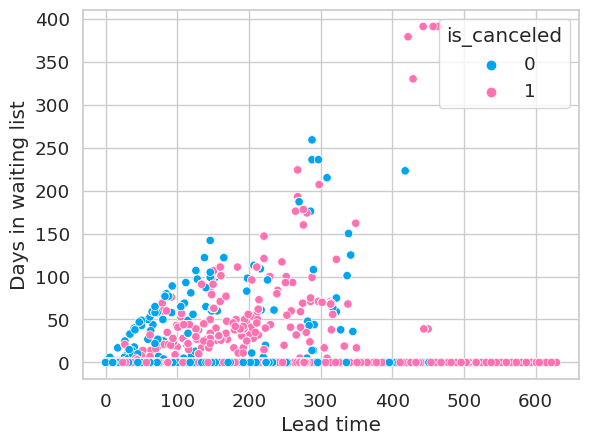

In [ ]:
#Total special request y adr.
#Car parking spaces y total special request.
#lead time y days in waiting list.

sns.scatterplot(data=df_visualizaciones, x="lead_time", y="days_in_waiting_list", hue="is_canceled", palette=["#00a4f0", "#ff71b0"])
plt.xlabel("Lead time")
plt.ylabel("Days in waiting list")
plt.title("")
plt.show()

<Axes: xlabel='total_of_special_requests', ylabel='adr'>

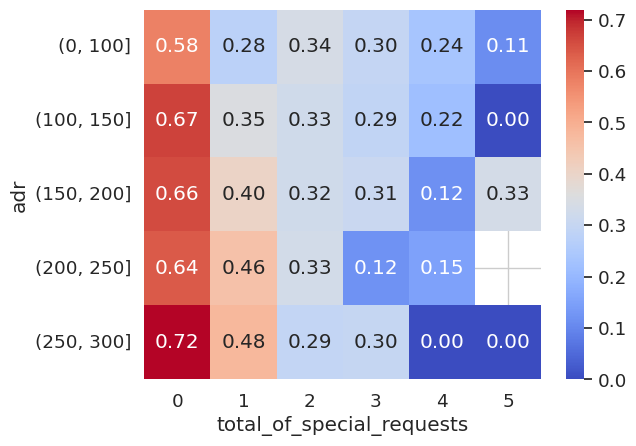

In [ ]:
adr_ranges = pd.cut(df_visualizaciones['adr'], bins=[0, 100, 150, 200, 250, 300])

sns.heatmap(df_visualizaciones.pivot_table(index=adr_ranges, columns='total_of_special_requests', 
                            values='is_canceled', aggfunc='mean'), 
                            cmap='coolwarm', annot=True, fmt='.2f')

A continuación, analizaremos como el tipo de estadía afecta a la tasa de cancelación de las reservas.

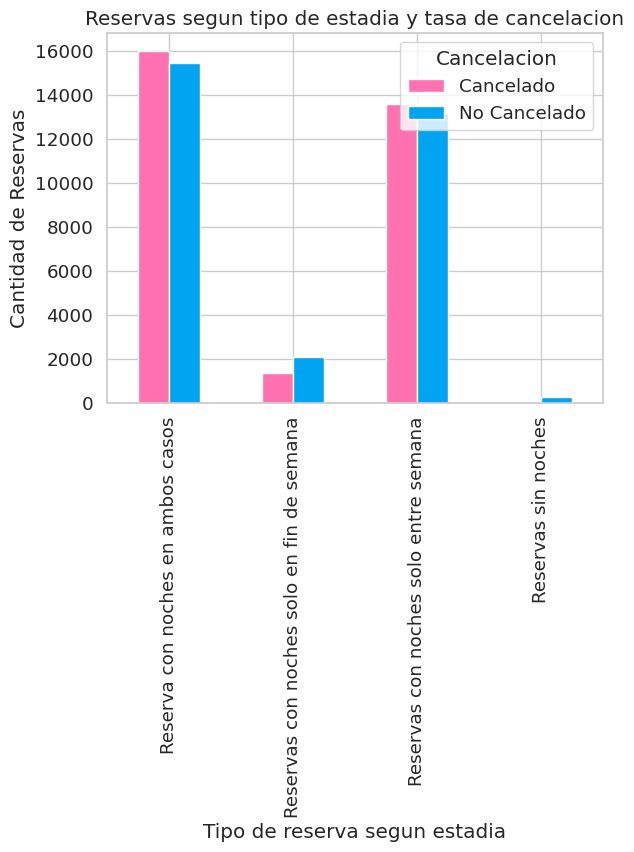

In [ ]:
df_Estadia = df_trabajo.copy()

stay_mapping = {
    0: "Reservas sin noches",
    1: "Reservas con noches solo entre semana",
    2: "Reservas con noches solo en fin de semana",
    3: "Reserva con noches en ambos casos"
}


df_Estadia['Estadia'] = (
    df_Estadia['stays_in_weekend_nights'].apply(lambda x: 2 if x > 0 else 0) + 
    df_Estadia['stays_in_week_nights'].apply(lambda x: 1 if x > 0 else 0)
)


df_Estadia['Estadia'] = df_Estadia['Estadia'].map(stay_mapping)
df_Estadia['Cancelacion'] = df_Estadia['is_canceled'].apply(lambda x: 'Cancelado' if x == 1 else 'No Cancelado')
grouped = df_Estadia.groupby(['Estadia', 'Cancelacion'])['id'].count().reset_index(name='count')

pivot = grouped.pivot(index='Estadia', columns='Cancelacion', values='count')

pivot.plot.bar(color=["#ff71b0","#00a4f0"],title='Reservas segun tipo de estadia y tasa de cancelacion',xlabel='Tipo de reserva segun estadia',ylabel='Cantidad de Reservas')

plt.show()

Por medio del gráfico, podemos notar que en la mayoría de los casos, la estadía no es parametro para decidir si una variable se cancelará o no. El único caso que deja ver un patrón marcado, es en el caso en que solo reserven durante el día, pero a su vez son tan pocos los casos que tampoco es una tendencia que se pueda pensar como obligatoriamente cierta.


## Datos Faltantes : analizar la presencia de datos faltantes en el dataset

- Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset
- Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos:
reemplazo de valores, eliminación de registros incompletos, etc.
- En caso de realizar imputaciones comparar las distribuciones de cada atributo

Podemos decir que en el dataframe no se encuentra ningun caracter "raro", ya que al hacer los graficos de cada variable en el analisis inicial se puede observar que no hay caracteres "atipicos". Lo cual tiene sentido ya que todas las variables numericas del dataframe son Integer o Floats, los cuales no aceptan caracteres como "-", "$", etc.

In [ ]:
df_trabajo.isna().sum() / len(df) * 100

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

Chequeemos que no haya valores negativos en las variables numericas.

In [ ]:
variables_numericas = df_trabajo.select_dtypes(include=['int64','float64'])
(variables_numericas < 0).any()

lead_time                         False
arrival_date_year                 False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
booking_changes                   False
agent                             False
company                           False
days_in_waiting_list              False
adr                                True
required_car_parking_spaces       False
total_of_special_requests         False
is_canceled                       False
dtype: bool

La variable "adr" es la unica que contiene algun valor negativo el cual llama la atencion, lo que vamos a hacer es cambiarlo por el mismo valor pero en positivo tomandolo como un error en el tipeo a la hora de pasar los datos.

### ADR

In [ ]:
indice_con_valor_negativo = df_trabajo.loc[df_trabajo['adr'] < 0].index
df_trabajo.loc[indice_con_valor_negativo[0], 'adr'] = df_trabajo.loc[indice_con_valor_negativo[0], 'adr'] * -1

In [ ]:
df_trabajo['adr'][indice_con_valor_negativo[0]]

6.38

Ahora vamos a chequear que la varialbe "adr" no contenga valores iguales a 0, ya que si fuese asi los huespedes tendrian una tarifa de 0 lo cual no tendria sentido.

In [ ]:
(df_trabajo['adr'] == 0).value_counts()

False    61029
True       884
Name: adr, dtype: int64

In [ ]:
tarifa_cero = df_trabajo[df_trabajo['adr'] == 0]
#La tarifa va a depender de la cantidad de huespedes que sean.

df_trabajo['total_people'] = df_trabajo['adults'] + df_trabajo['children']

filas_adr_cero = df_trabajo.loc[df_trabajo['adr'] == 0].sort_values('total_people')

for i, fila in filas_adr_cero.iterrows():
    adults = fila['adults']
    children = fila['children']
    total_people = fila['total_people']
    
    filas_similares = df_trabajo.loc[(df_trabajo['adr'] != 0) & (df_trabajo['total_people'] == total_people)]
    
    for j, filas_similares in filas_similares.iterrows():
        if filas_similares['adr'] != 0:
            df_trabajo.loc[i, 'adr'] = filas_similares['adr']
            break

df_trabajo.drop('total_people', axis=1, inplace=True)

Ahora volvamos a chequear si hay valores con "adr" 0.

In [ ]:
(df_trabajo['adr'] == 0).value_counts()

False    61904
True         9
Name: adr, dtype: int64

Se puede observar que pasamos de tener 884 valores "adr" en 0 a tener solamente 9, podemos verlo pero seguramente estos 9 sean valores atipicos
por lo que no encontro relacion alguna para poder cambiar su valor.
Veamos la cantidad de adultos que tienen estas filas.

In [ ]:
df_trabajo[df_trabajo['adr'] == 0]['adults']

4064     40
11830    20
13101     6
19146    26
35477    10
38305    26
55112    27
59059    26
59165    55
Name: adults, dtype: int64

Podemos observar que la cantidad de adultos es inusual por eso no encontro ninguna relacion con las demas datos. Por lo que estos datos podrian ser considerados
atipicos y veremos que hacemos con ellos mas adelante.

###ADULTS

In [ ]:
(df_trabajo['adults'] == 0).value_counts()

False    61716
True       197
Name: adults, dtype: int64

In [ ]:
adultos_en_cero = df_trabajo.loc[df_trabajo['adults'] == 0]

for i, fila in adultos_en_cero.iterrows():
    adr = fila['adr']
    
    # Filtrar las reservas que tienen un valor de 'adr' similar (+-0.5)
    filas_similares = df_trabajo.loc[(df_trabajo['adr'] >= adr - 0.5) & (df_trabajo['adr'] <= adr + 0.5) & (df_trabajo['adults'] > 0)]
    
    avg_adults = np.rint(filas_similares['adults'].mean())
    
    df_trabajo.loc[i, 'adults'] = avg_adults

In [ ]:
(df_trabajo['adults'] == 0).value_counts()

False    61913
Name: adults, dtype: int64

Podemos notar que los valores que antes eran 0 en adultos ahora pasaron a cambiarse a valores estimados segun el adr en un rango de +-0.5, el cual se puede notar a continuacion.

In [ ]:
indices = df_trabajo.loc[adultos_en_cero.index]
indices['adults']

96       2
212      2
270      2
326      2
464      2
        ..
59982    2
60837    2
60994    2
61003    2
61298    1
Name: adults, Length: 197, dtype: int64

### Company

Como podemos ver mas arriba cuando calculamos el porcentaje de 'Nans' para las variables del dataframe, la variable "company" figura con un 94% de valores nulos. Por lo que
no consideramos esta columna relevante para el analisis ya que la mayoria de datos faltan y no se le puede encontrar relacion alguna con algo.
Debido a esto decidimos que la mejor opcion para el caso es eliminar directamente la variable "company"

In [ ]:
df_trabajo.drop("company", axis="columns", inplace=True)

### Dias de estadia


Chequear si hay una estadia que los dias de semana y fin de semana no tiene sentido

In [ ]:
dias_de_reserva = df_trabajo.copy()
dias_de_reserva.sort_values("stays_in_weekend_nights", inplace=True)
min = 0
max = 5 
dias_incorrectos = []
last_num = 0
for i, fila in dias_de_reserva.iterrows():
    noche_finde = fila['stays_in_weekend_nights']
    noche_semana = fila['stays_in_week_nights']

    if noche_finde != last_num and noche_finde > 1:
      if noche_finde%2 == 0:
        max = max + 5
      else:
        min = min + 5

    if noche_semana < min or noche_semana > max:
      dias_incorrectos.append(i)
    
    last_num = noche_finde
    
dias_incorrectos

[]

Podemos observar que no existen reservas con cantidad de días incorrectos teniendo en cuenta la relacion de cantidad de dias en fin de semana y entre semana, ya que siguen la lógica natural.

### Paises

Como se ve en la tabla paises tiene un porcentaje muy bajo de NaNs y como se dijo cuando analizamos la columna en la exploracion inicial hay muchos paises con muy pocas reservas. Por lo tanto lo que vamos a hacer es meter a esos paises y los NaNs todos en una pais "Otros" para limpiar el dataset

In [ ]:
pivot = df_trabajo['country'].value_counts().to_frame()
pivot

country
PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
..       ...
HND        1
FJI        1
LIE        1
ATA        1
RWA        1

[149 rows x 1 columns]

In [ ]:
paises_con_pocas_reservas = pivot[pivot['country'] < 500].index
paises_con_pocas_reservas = paises_con_pocas_reservas.to_list()

In [ ]:
df_trabajo['country'].replace(paises_con_pocas_reservas, "Otros", inplace=True)
df_trabajo['country'].fillna("Otros")

0          USA
1          PRT
2          CHE
3          PRT
4          FRA
         ...  
61908      ESP
61909      FRA
61910      FRA
61911      PRT
61912    Otros
Name: country, Length: 61913, dtype: object

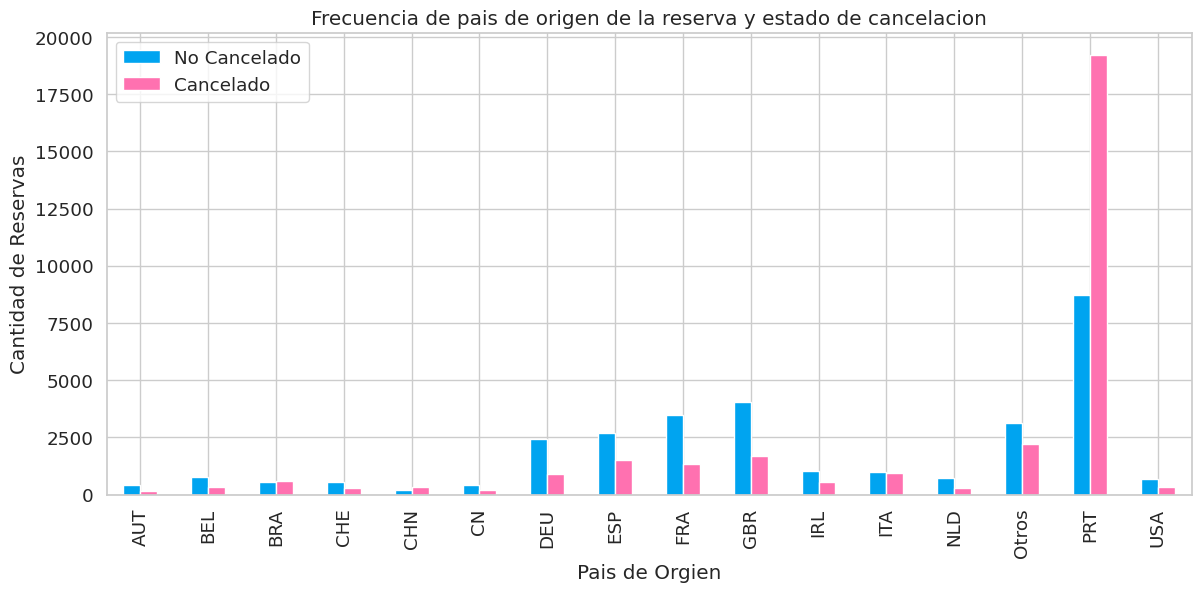

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="country", columns="is_canceled", values="id", aggfunc="count")
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6))
pivot_table.plot.bar(ax=ax,color=["#00a4f0", "#ff71b0"],title="Frecuencia de pais de origen de la reserva y estado de cancelacion",xlabel='Pais de Orgien',ylabel='Cantidad de Reservas')
plt.show()

## Valores atípicos : analizar la existencia de valores atípicos

- Detectar valores atípicos en los datos tanto en forma univariada como
multivariada. Realizar gráficos que permitan visualizar los valores atípicos.
- Explicar qué características poseen los datos atípicos detectados.
- Decidir el tratamiento a aplicar sobre los mismos.

### Adultos



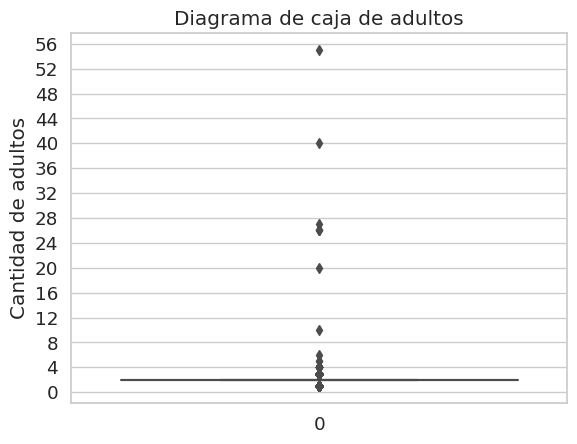

count    61913.000000
mean         1.868913
std          0.579790
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

In [ ]:
sns.boxplot(data=df_trabajo["adults"])
plt.ylabel("Cantidad de adultos")
plt.title("Diagrama de caja de adultos")
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(4))
plt.show()
df_trabajo["adults"].describe()

In [ ]:
(df_trabajo["adults"] >= 6).value_counts()

False    61904
True         9
Name: adults, dtype: int64

Con lo previo visto en los valores faltantes de ADR y la poca cantidad de reservas que tengan mas de 5 adultos vamos a eliminar esas filas

In [ ]:
indice_outlier=df_trabajo[df_trabajo['adults'] > 5].index
df_trabajo.drop(indice_outlier, inplace=True)

### Dias de Anticipo

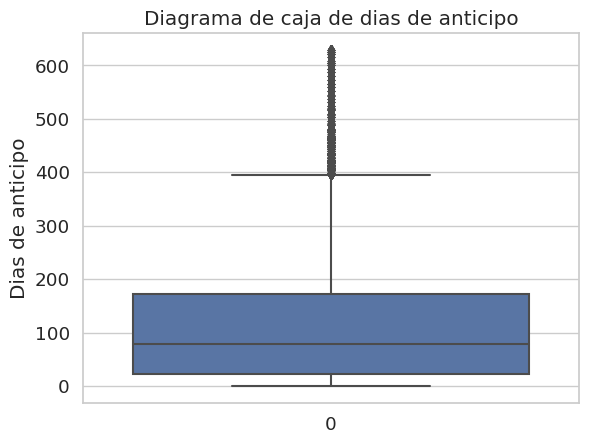

count    61904.000000
mean       112.215818
std        110.693331
min          0.000000
25%         23.000000
50%         78.000000
75%        172.000000
max        629.000000
Name: lead_time, dtype: float64

In [ ]:
sns.boxplot(data=df_trabajo["lead_time"])
plt.ylabel("Dias de anticipo")
plt.title("Diagrama de caja de dias de anticipo")
plt.show()
df_trabajo["lead_time"].describe()

In [ ]:
df_z = df_trabajo.copy()
#z-score modificado Edad
mediana_lead=np.median(df_z.lead_time)
MAD=np.median(np.absolute(df_z.lead_time-mediana_lead))

df_z['zm_lead']=(df_z.lead_time - mediana_lead)*0.6745/MAD

df_z[["lead_time","zm_lead"]]

lead_time   zm_lead
0             49 -0.300931
1              4 -0.767892
2             25 -0.549977
3             26 -0.539600
4            104  0.269800
...          ...       ...
61908         24 -0.560354
61909          0 -0.809400
61910         10 -0.705631
61911        143  0.674500
61912         57 -0.217915

[61904 rows x 2 columns]

Siguiendo la regla de "oro" los valores del z-score modificado son considerados outliers siempre que sean mayores a 3.5 o menores a -3.5

In [ ]:
df_z[df_z["zm_lead"]>3.5]

hotel  lead_time  arrival_date_year arrival_date_month  \
15     City Hotel        465               2017               July   
51     City Hotel        489               2016           November   
95     City Hotel        454               2016            October   
99     City Hotel        420               2016          September   
215    City Hotel        426               2016          September   
...           ...        ...                ...                ...   
61753  City Hotel        433               2016          September   
61761  City Hotel        496               2016           November   
61768  City Hotel        433               2016          September   
61783  City Hotel        454               2016            October   
61790  City Hotel        538               2016           December   

       arrival_date_week_number  arrival_date_day_of_month  \
15                           30                         26   
51                           46                         10   
95                           41                          6   
99                           36                          3   
215                          37                          8   
...                         ...                        ...   
61753                        37                          8   
61761                        47                         17   
61768                        38                         15   
61783                        41                          6   
61790                        53                         29   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
15                           0                     3       2       0.0  ...   
51                           0                     2       2       0.0  ...   
95                           0                     2       2       0.0  ...   
99                           2                     2       2       0.0  ...   
215                          0                     2       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61753                        0                     3       2       0.0  ...   
61761                        0                     2       2       0.0  ...   
61768                        0                     2       2       0.0  ...   
61783                        0                     2       2       0.0  ...   
61790                        0                     2       2       0.0  ...   

       deposit_type  agent days_in_waiting_list    customer_type     adr  \
15       No Deposit  229.0                    0  Transient-Party  112.67   
51       Non Refund    1.0                    0        Transient   62.80   
95       Non Refund    1.0                    0        Transient   62.00   
99       Non Refund   35.0                    0        Transient   75.00   
215      Non Refund    1.0                    0        Transient   62.00   
...             ...    ...                  ...              ...     ...   
61753    Non Refund    3.0                    0        Transient   70.00   
61761    Non Refund    1.0                    0        Transient   62.80   
61768    Non Refund    1.0                    0        Transient   62.00   
61783    Non Refund    1.0                    0        Transient   62.00   
61790    Non Refund    1.0                    0        Transient   62.80   

       required_car_parking_spaces  total_of_special_requests  \
15                               0                          0   
51                               0                          0   
95                               0                          0   
99                               0                          0   
215                              0                          0   
...                            ...                        ...   
61753                            0                          0   
61761                            0          

In [ ]:
df_z[df_z['zm_lead'] < -3.5]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, id, is_canceled, zm_lead]
Index: []

[0 rows x 31 columns]

Una vez aplicada la regla, procedemos a eliminar esos outliers y a graficar nuevamente el boxplot.

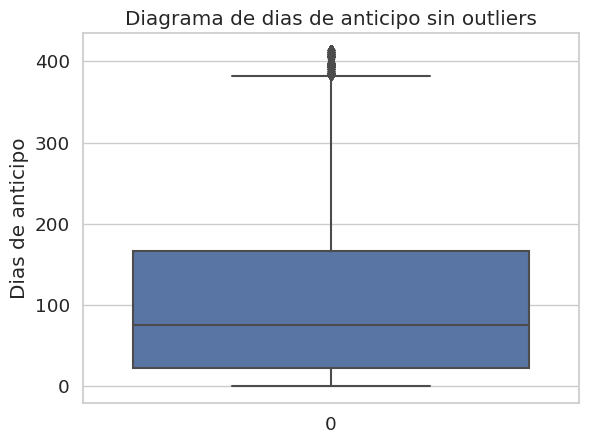

count    60825.000000
mean       105.633292
std         99.588821
min          0.000000
25%         22.000000
50%         75.000000
75%        166.000000
max        414.000000
Name: lead_time, dtype: float64

In [ ]:
df_visual = df_z[df_z['zm_lead'] <= 3.5]

sns.boxplot(data=df_visual['lead_time'])
plt.ylabel("Dias de anticipo")
plt.title("Diagrama de dias de anticipo sin outliers")
plt.show()
df_visual["lead_time"].describe()

Podemos notar como al sacar los que no cumplen la regla de oro, saca varios valores "atipicos" y baja el valor promedio, pero nosotros pensamos que algunos de esos valores realmente no son "atipicos" sino que son valores dentro de lo normal. De esta manera evitamos borrar 1000 registros que proporcionan informacion relevante.

### Dias de estadia

In [ ]:
#stays_in_week_nights
#stays_in_weekend_nights

df_z = df_trabajo.loc[:,['stays_in_weekend_nights','stays_in_week_nights']]
#z-score modificado semana 
mediana_semana=np.median(df_z['stays_in_week_nights'])
MAD=np.median(np.absolute(df_z['stays_in_week_nights']-mediana_semana))

df_z['zm_semana']=(df_z['stays_in_week_nights'] - mediana_semana)*0.6745/MAD

#z-score modificado finde semana 
mediana_finde=np.median(df_z['stays_in_weekend_nights'])
MAD=np.median(np.absolute(df_z['stays_in_weekend_nights']-mediana_finde))

df_z['zm_finde']=(df_z['stays_in_weekend_nights'] - mediana_finde)*0.6745/MAD

df_z

stays_in_weekend_nights  stays_in_week_nights  zm_semana  zm_finde
0                            1                     2     0.0000    0.0000
1                            0                     1    -0.6745   -0.6745
2                            0                     1    -0.6745   -0.6745
3                            2                     5     2.0235    0.6745
4                            2                     5     2.0235    0.6745
...                        ...                   ...        ...       ...
61908                        0                     2     0.0000   -0.6745
61909                        0                     1    -0.6745   -0.6745
61910                        1                     2     0.0000    0.0000
61911                        2                     5     2.0235    0.6745
61912                        2                     5     2.0235    0.6745

[61904 rows x 4 columns]

In [ ]:
df_z[df_z["zm_semana"]>3.5]

stays_in_weekend_nights  stays_in_week_nights  zm_semana  zm_finde
6                            4                     9     4.7215    2.0235
94                           4                     8     4.0470    2.0235
191                          3                     8     4.0470    1.3490
214                          4                    10     5.3960    2.0235
287                          3                    10     5.3960    1.3490
...                        ...                   ...        ...       ...
61705                        4                    10     5.3960    2.0235
61747                        4                    10     5.3960    2.0235
61750                        2                     8     4.0470    0.6745
61840                        5                    11     6.0705    2.6980
61865                        4                    10     5.3960    2.0235

[1195 rows x 4 columns]

In [ ]:
df_z[df_z["zm_finde"]>3.5]

stays_in_weekend_nights  stays_in_week_nights  zm_semana  zm_finde
3855                        10                    20    12.1410    6.0705
5295                         8                    22    13.4900    4.7215
6423                         8                    21    12.8155    4.7215
9229                         9                    24    14.8390    5.3960
9608                         8                    19    11.4665    4.7215
...                        ...                   ...        ...       ...
59100                        8                    20    12.1410    4.7215
59231                        8                    22    13.4900    4.7215
60483                       10                    25    15.5135    6.0705
60607                        8                    20    12.1410    4.7215
61043                        8                    21    12.8155    4.7215

[62 rows x 4 columns]

Multivariado

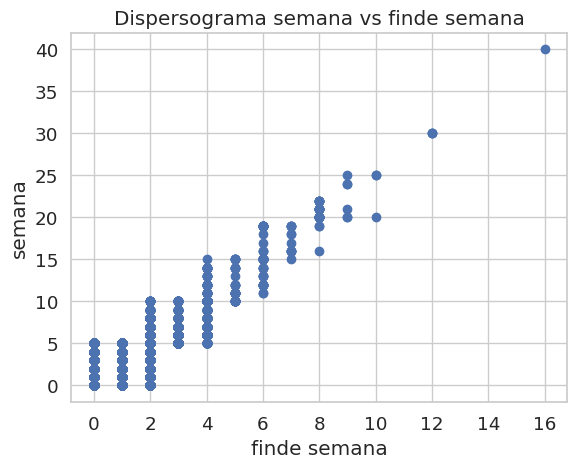

In [ ]:
plt.scatter(df_trabajo['stays_in_weekend_nights'],df_trabajo['stays_in_week_nights'])
plt.title('Dispersograma semana vs finde semana')
plt.xlabel('finde semana')
plt.ylabel('semana')
plt.show()

In [ ]:
# Calcular la matriz de covarianza
cov = df_z[['stays_in_weekend_nights', 'stays_in_week_nights']].cov()

# Calcular la inversa de la matriz de covarianza
inv_cov = np.linalg.inv(cov)

# Calcular la distancia de Mahalanobis de cada punto respecto a la media
mean = [df_z['stays_in_weekend_nights'].mean(), df_z['stays_in_week_nights'].mean()]
df_z['mahalanobis'] = df_z.apply(lambda row: mahalanobis(row[['stays_in_weekend_nights', 'stays_in_week_nights']], mean, inv_cov), axis=1)

In [ ]:
df_z['mahalanobis'].describe()

count    61904.000000
mean         1.223971
std          0.708428
min          0.266435
25%          0.954101
50%          1.124028
75%          1.419347
max         20.851583
Name: mahalanobis, dtype: float64

In [ ]:
np.sort(df_z['mahalanobis'])

array([ 0.26643454,  0.26643454,  0.26643454, ..., 15.29710364,
       15.29710364, 20.85158257])

In [ ]:
umbral = 8

df_z[df_z['mahalanobis'] > umbral]

stays_in_weekend_nights  stays_in_week_nights  zm_semana  zm_finde  \
454                          6                    19    11.4665    3.3725   
3855                        10                    20    12.1410    6.0705   
5295                         8                    22    13.4900    4.7215   
5748                         6                    19    11.4665    3.3725   
6423                         8                    21    12.8155    4.7215   
...                        ...                   ...        ...       ...   
59131                        6                    19    11.4665    3.3725   
59231                        8                    22    13.4900    4.7215   
60483                       10                    25    15.5135    6.0705   
60607                        8                    20    12.1410    4.7215   
61043                        8                    21    12.8155    4.7215   

       mahalanobis  
454       8.800986  
3855     10.675025  
5295     10.609519  
5748      8.800986  
6423     10.167167  
...            ...  
59131     8.800986  
59231    10.609519  
60483    12.519887  
60607     9.742702  
61043    10.167167  

[74 rows x 5 columns]

In [ ]:
df_z[['zm_semana','zm_finde','mahalanobis']]

zm_semana  zm_finde  mahalanobis
0         0.0000    0.0000     0.361076
1        -0.6745   -0.6745     1.011589
2        -0.6745   -0.6745     1.011589
3         2.0235    0.6745     1.413232
4         2.0235    0.6745     1.413232
...          ...       ...          ...
61908     0.0000   -0.6745     0.954101
61909    -0.6745   -0.6745     1.011589
61910     0.0000    0.0000     0.361076
61911     2.0235    0.6745     1.413232
61912     2.0235    0.6745     1.413232

[61904 rows x 3 columns]

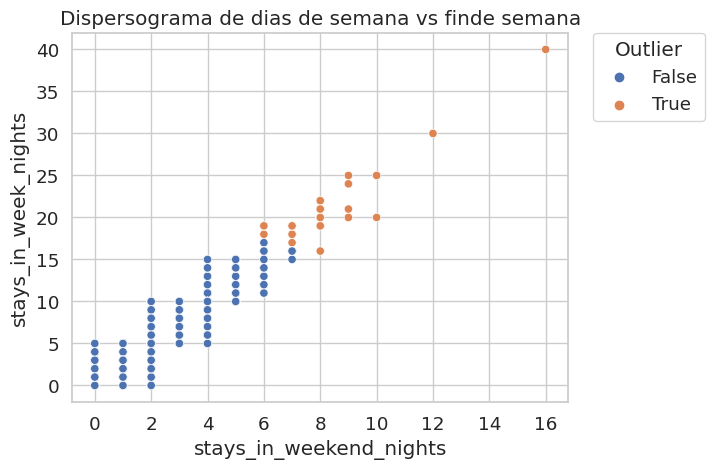

In [ ]:
#Grafico scatter
es_outlier = (df_z['mahalanobis'] > umbral)

sns.scatterplot(x=df_z.stays_in_weekend_nights,y=df_z.stays_in_week_nights, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma de dias de semana vs finde semana')
plt.show()

In [ ]:
indice_outlier=df_z[df_z['mahalanobis'] > umbral].index
df_trabajo.drop(indice_outlier, inplace=True)

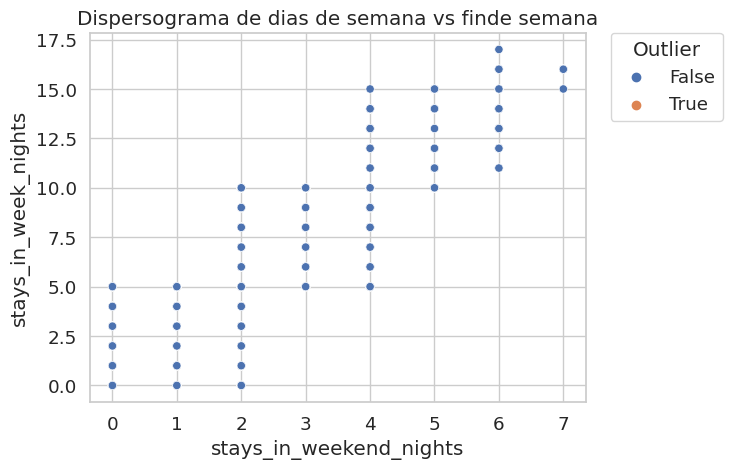

In [ ]:
es_outlier = (df_z['mahalanobis'] > umbral)

sns.scatterplot(x=df_trabajo.stays_in_weekend_nights,y=df_z.stays_in_week_nights, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma de dias de semana vs finde semana')
plt.show()

### Cancelaciones previas

In [ ]:
df_trabajo['previous_cancellations'].describe()

count    61830.000000
mean         0.114912
std          0.994368
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

In [ ]:
df_z = df_trabajo.copy()

#z-score cancelaciones

media_cancelaciones=np.mean(df_z.previous_cancellations)
std_cancelaciones=np.std(df_z.previous_cancellations)
df_z['z_cancelaciones']=(df_z.previous_cancellations - media_cancelaciones)/std_cancelaciones

In [ ]:
df_z[df_z['z_cancelaciones'] > 3][['z_cancelaciones','previous_cancellations']]

z_cancelaciones  previous_cancellations
152          26.031902                      26
337          18.992200                      19
349           3.907123                       4
802          26.031902                      26
1579         10.946826                      11
...                ...                     ...
59717        13.963841                      14
59761        24.020559                      24
59879        10.946826                      11
60138        25.026231                      25
60793         3.907123                       4

[162 rows x 2 columns]

# 

In [ ]:
indice_outlier=df_z[df_z['z_cancelaciones'] > 3].index
df_trabajo.drop(indice_outlier, inplace=True)

In [ ]:
df_trabajo['previous_cancellations'].describe()

count    61668.000000
mean         0.070685
std          0.266413
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: previous_cancellations, dtype: float64

Al eliminar los considerados outliers podemos ver que esto influye mas que nada en el maximo, en el desvio estandar y la media.

### Reservas anteriores no canceladas

In [ ]:
df_trabajo['previous_bookings_not_canceled'].describe()

count    61668.000000
mean         0.094749
std          1.020263
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         43.000000
Name: previous_bookings_not_canceled, dtype: float64

In [ ]:
df_z = df_trabajo.copy()

#z-score cancelaciones

media_reservas=np.mean(df_z.previous_bookings_not_canceled)
std_reservas=np.std(df_z.previous_bookings_not_canceled)
df_z['z_reservas']=(df_z.previous_bookings_not_canceled - media_reservas)/std_reservas

In [ ]:
df_z[['previous_bookings_not_canceled','z_reservas']]

previous_bookings_not_canceled  z_reservas
0                                   0   -0.092868
1                                   0   -0.092868
2                                   0   -0.092868
3                                   0   -0.092868
4                                   0   -0.092868
...                               ...         ...
61908                               0   -0.092868
61909                               0   -0.092868
61910                               0   -0.092868
61911                               0   -0.092868
61912                               0   -0.092868

[61668 rows x 2 columns]

In [ ]:
df_z[df_z['z_reservas'] > 3][['previous_bookings_not_canceled','z_reservas']]

previous_bookings_not_canceled  z_reservas
227                                 8    7.748314
267                                 6    5.788019
525                                 8    7.748314
735                                 7    6.768166
768                                 7    6.768166
...                               ...         ...
61115                              12   11.668905
61142                              13   12.649053
61275                               8    7.748314
61410                               6    5.788019
61777                              13   12.649053

[455 rows x 2 columns]

Observando los graficos y las tablas hechas anteriormente, podemos ver que aunque la regla da que los valores mayores a 3, considerando lo importante que es esta variable vamos a considerar hasta 5 reservas no canceladas.

In [ ]:
indice_outlier=df_z[df_z['previous_bookings_not_canceled'] > 5].index
df_trabajo.drop(indice_outlier, inplace=True)

In [ ]:
df_trabajo['previous_bookings_not_canceled'].describe()

count    61392.000000
mean         0.038735
std          0.324535
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: previous_bookings_not_canceled, dtype: float64

### Cambio de reserva 

In [ ]:
df_trabajo['booking_changes'].describe()

count    61392.000000
mean         0.195677
std          0.609021
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64

In [ ]:
df_z = df_trabajo.copy()

#z-score cancelaciones

media_reserva=np.mean(df_z.booking_changes)
std_reserva=np.std(df_z.booking_changes)
df_z['z_reserva']=(df_z.booking_changes - media_reserva)/std_reserva

In [ ]:
df_z[['booking_changes','z_reserva']]

booking_changes  z_reserva
0                    0  -0.321300
1                    0  -0.321300
2                    0  -0.321300
3                    0  -0.321300
4                    0  -0.321300
...                ...        ...
61908                0  -0.321300
61909                0  -0.321300
61910                0  -0.321300
61911                0  -0.321300
61912                1   1.320693

[61392 rows x 2 columns]

In [ ]:
df_z[df_z['z_reserva'] > 3][['booking_changes','z_reserva']]

booking_changes  z_reserva
83                   3   4.604678
100                  5   7.888663
211                  5   7.888663
231                  4   6.246670
700                  3   4.604678
...                ...        ...
61679                3   4.604678
61722                4   6.246670
61746                3   4.604678
61806                4   6.246670
61818                4   6.246670

[694 rows x 2 columns]

In [ ]:
indice_outlier=df_z[df_z['booking_changes'] > 3].index
df_trabajo.drop(indice_outlier, inplace=True)

In [ ]:
df_trabajo['booking_changes'].describe()

count    61099.000000
mean         0.172278
std          0.490283
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: booking_changes, dtype: float64

### Adr

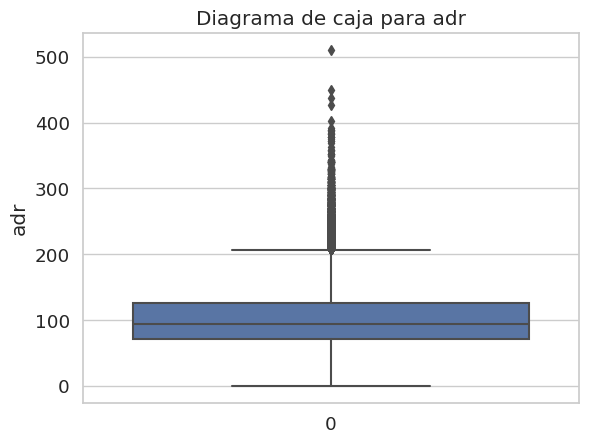

In [ ]:
sns.boxplot(data=df_trabajo['adr'])
plt.title("Diagrama de caja para adr")
plt.ylabel("adr")
plt.show()

In [ ]:
df_z = df_trabajo.copy()
#z-score modificado Edad
mediana_adr=np.median(df_z.lead_time)
MAD=np.median(np.absolute(df_z.adr-mediana_adr))

df_z['zm_adr']=(df_z.adr - mediana_adr)*0.6745/MAD

df_z[["adr","zm_adr"]]

adr    zm_adr
0      115.50  0.936806
1       42.00 -0.899333
2      229.00  3.772204
3       75.00 -0.074944
4       75.00 -0.074944
...       ...       ...
61908   48.00 -0.749444
61909  149.00  1.773685
61910   95.00  0.424685
61911   36.05 -1.047973
61912  143.29  1.631041

[61099 rows x 2 columns]

In [ ]:
df_z[df_z['zm_adr'] > 3.5][['adr','zm_adr']]

adr    zm_adr
2      229.00  3.772204
111    227.25  3.728486
217    240.00  4.047000
238    302.50  5.608343
299    219.00  3.522389
...       ...       ...
61834  305.00  5.670796
61849  232.33  3.855392
61871  233.00  3.872130
61889  263.00  4.621574
61903  220.00  3.547370

[1726 rows x 2 columns]

In [ ]:
# Calcular la matriz de covarianza
cov = df_z[['adr','adults']].cov()

# Calcular la inversa de la matriz de covarianza
inv_cov = np.linalg.inv(cov)

# Calcular la distancia de Mahalanobis de cada punto respecto a la media
mean = [df_z['adr'].mean(), df_z['adults'].mean()]
df_z['mahalanobis'] = df_z.apply(lambda row: mahalanobis(row[['adr','adults']], mean, inv_cov), axis=1)

In [ ]:
df_z['mahalanobis'].describe()

count    61099.000000
mean         1.166465
std          0.799586
min          0.279077
25%          0.492754
50%          0.962277
75%          1.859449
max          9.755178
Name: mahalanobis, dtype: float64

In [ ]:
np.sort(df_z['mahalanobis'])

array([0.27907722, 0.27907779, 0.27907779, ..., 7.37144277, 7.66166911,
       9.75517812])

In [ ]:
df_z[['adr','zm_adr','mahalanobis']]

adr    zm_adr  mahalanobis
0      115.50  0.936806     2.004758
1       42.00 -0.899333     1.484807
2      229.00  3.772204     2.733614
3       75.00 -0.074944     0.773227
4       75.00 -0.074944     0.773227
...       ...       ...          ...
61908   48.00 -0.749444     1.353388
61909  149.00  1.773685     2.392274
61910   95.00  0.424685     1.878526
61911   36.05 -1.047973     1.615557
61912  143.29  1.631041     0.851555

[61099 rows x 3 columns]

In [ ]:
umbral = 4

df_z[df_z['mahalanobis'] > umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
238    Resort Hotel         38               2017             August   
307      City Hotel         31               2017                May   
320    Resort Hotel        212               2017               July   
439      City Hotel         21               2017               July   
552      City Hotel        127               2017               July   
...             ...        ...                ...                ...   
60873    City Hotel          4               2016                May   
61256    City Hotel         18               2017                May   
61452  Resort Hotel          8               2017             August   
61745  Resort Hotel        205               2017             August   
61834  Resort Hotel         95               2017               July   

       arrival_date_week_number  arrival_date_day_of_month  \
238                          32                          7   
307                          20                         19   
320                          28                         14   
439                          27                          6   
552                          30                         24   
...                         ...                        ...   
60873                        20                         13   
61256                        19                         10   
61452                        31                          5   
61745                        31                          2   
61834                        30                         24   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
238                          1                     5       2       1.0  ...   
307                          0                     1       3       0.0  ...   
320                          3                     7       2       2.0  ...   
439                          0                     1       2       2.0  ...   
552                          1                     4       3       1.0  ...   
...                        ...                   ...     ...       ...  ...   
60873                        0                     1       4       0.0  ...   
61256                        2                     9       2       0.0  ...   
61452                        0                     1       2       2.0  ...   
61745                        1                     4       2       2.0  ...   
61834                        1                     4       2       2.0  ...   

       agent days_in_waiting_list customer_type     adr  \
238    250.0                    0     Transient  302.50   
307     14.0                    0     Transient  279.00   
320    240.0                    0     Transient  289.60   
439      9.0                    0     Transient  307.00   
552      8.0                    0     Transient  282.50   
...      ...                  ...           ...     ...   
60873    NaN                    0     Transient  229.00   
61256    8.0                    0     Transient  294.55   
61452  240.0                    0     Transient  330.00   
61745  240.0                    0     Transient  300.40   
61834  240.0                    0     Transient  305.00   

      required_car_parking_spaces  total_of_special_requests  \
238                             0                          1   
307                             0                          0   
320                             0                          0   
439                             0                          0   
552                             0                          1   
...                           ...                        ...   
60873                           1                          4   
61256                           0                          1   
61452                           0                          0   
61745                           0                          2   
61834                           0         

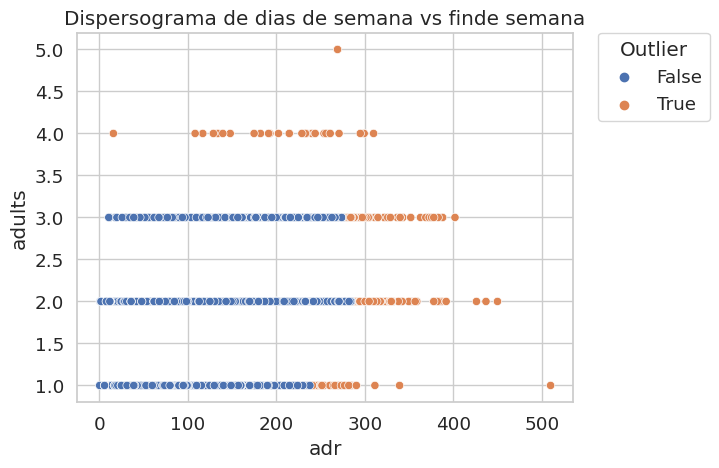

In [ ]:
es_outlier = (df_z['mahalanobis'] > umbral)

sns.scatterplot(x=df_z.adr,y=df_z.adults, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma de dias de semana vs finde semana')
plt.show()

In [ ]:
indice_outlier=df_z[df_z['mahalanobis'] > umbral].index
df_trabajo.drop(indice_outlier, inplace=True)

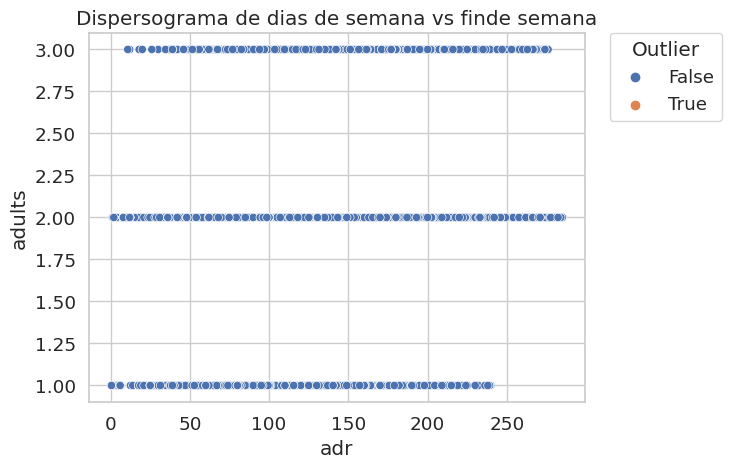

In [ ]:
es_outlier = (df_z['mahalanobis'] > umbral)

sns.scatterplot(x=df_trabajo.adr,y=df_trabajo.adults, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma de dias de semana vs finde semana')
plt.show()

### Espacio de estacionamiento

In [ ]:
df_trabajo['required_car_parking_spaces'].describe()

count    60791.000000
mean         0.048527
std          0.217995
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: required_car_parking_spaces, dtype: float64

In [ ]:
df_z = df_trabajo.copy()

#z-score cancelaciones

media_estacionamiento=np.mean(df_z.required_car_parking_spaces)
std_estacionamiento=np.std(df_z.required_car_parking_spaces)
df_z['z_estacionamiento']=(df_z.required_car_parking_spaces - media_estacionamiento)/std_estacionamiento

In [ ]:
df_z[['required_car_parking_spaces','z_estacionamiento']]

required_car_parking_spaces  z_estacionamiento
0                                0          -0.222608
1                                1           4.364696
2                                0          -0.222608
3                                0          -0.222608
4                                0          -0.222608
...                            ...                ...
61908                            0          -0.222608
61909                            0          -0.222608
61910                            0          -0.222608
61911                            0          -0.222608
61912                            0          -0.222608

[60791 rows x 2 columns]

In [ ]:
df_z[df_z['z_estacionamiento'] > 3][['required_car_parking_spaces','z_estacionamiento']]

required_car_parking_spaces  z_estacionamiento
1                                1           4.364696
14                               1           4.364696
64                               1           4.364696
71                               1           4.364696
139                              1           4.364696
...                            ...                ...
61816                            1           4.364696
61826                            1           4.364696
61833                            1           4.364696
61886                            1           4.364696
61890                            1           4.364696

[2931 rows x 2 columns]

In [ ]:
indice_outlier=df_z[df_z['z_estacionamiento'] > 3].index
df_trabajo.drop(indice_outlier, inplace=True)

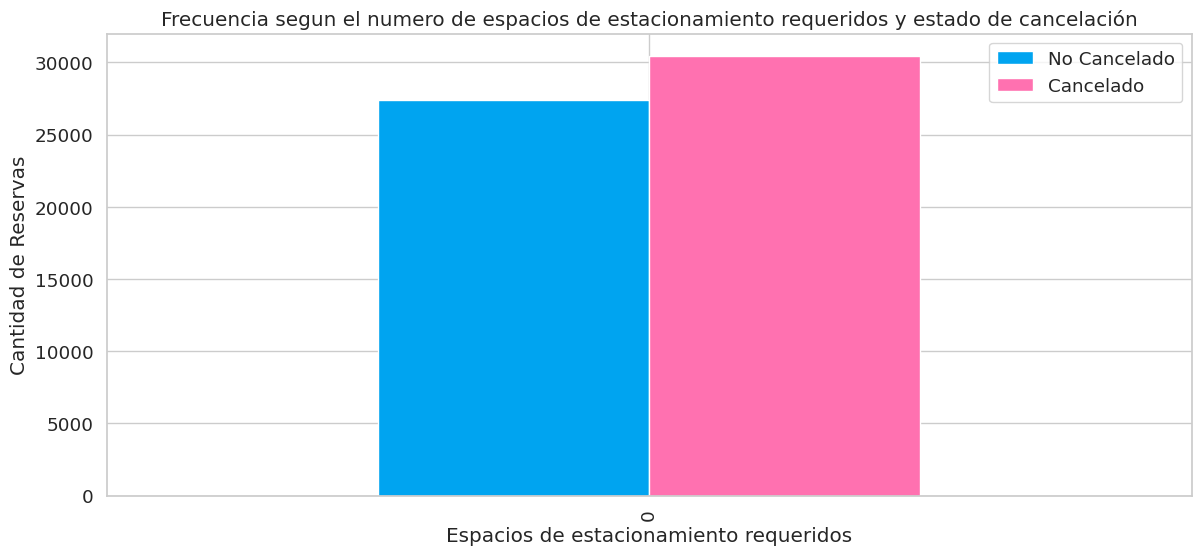

In [ ]:
pivot_table = pd.pivot_table(df_trabajo, index="required_car_parking_spaces", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de espacios de estacionamiento requeridos y estado de cancelación",xlabel='Espacios de estacionamiento requeridos',ylabel='Cantidad de Reservas')

### Pedidos especiales


<Axes: >

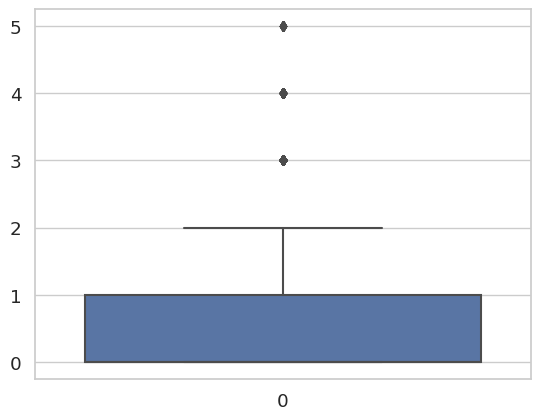

In [ ]:
sns.boxplot(data=df_trabajo['total_of_special_requests'])

In [ ]:
quartiles = df_trabajo['total_of_special_requests'].quantile([0.25, 0.75])
print(quartiles)

0.25    0.0
0.75    1.0
Name: total_of_special_requests, dtype: float64


In [ ]:
df_trabajo['total_of_special_requests'].value_counts()

0    36768
1    14313
2     5606
3     1039
4      116
5       18
Name: total_of_special_requests, dtype: int64

In [ ]:
outlier = df_trabajo[df_trabajo['total_of_special_requests'] > 3]
outlier['total_of_special_requests']

433      4
713      4
852      4
1148     4
1505     4
        ..
59932    4
60472    5
60695    4
61133    5
61383    4
Name: total_of_special_requests, Length: 134, dtype: int64

In [ ]:
indice_outlier=df_trabajo[df_trabajo['total_of_special_requests'] > 3].index
df_trabajo.drop(indice_outlier, inplace=True)

Divino

<Axes: >

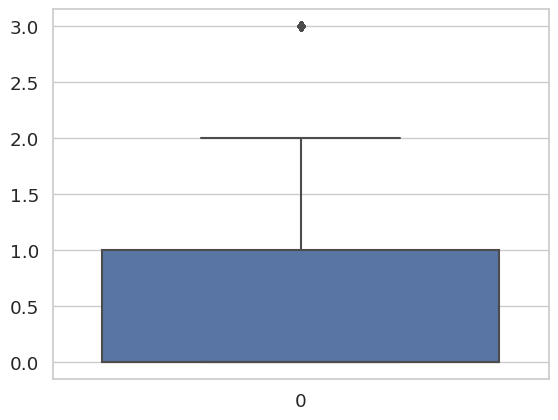

In [ ]:
sns.boxplot(data=df_trabajo['total_of_special_requests'])